# Classificateur de reconnaissance des panneaux de signalisation


Dans ce projet, nous avons développé un modèle de classification des panneaux de signalisation à l'aide de diverses architectures de réseaux neuronaux, notamment AlexNet, DenseNet, ResNet50, ResNet101, VGGNet et CNN. L'objectif était de classer avec précision les panneaux de signalisation en fonction de leurs caractéristiques visuelles.

Nous avons entraîné et évalué chaque modèle à l'aide d'un vaste ensemble de données d'images de panneaux de signalisation. Le processus d'entraînement a consisté à optimiser les paramètres du modèle et à ajuster les hyperparamètres afin d'obtenir les meilleures performances. Nous avons utilisé différentes configurations architecturales pour chaque modèle afin d'explorer leurs capacités de classification des panneaux de signalisation.

Nos résultats expérimentaux ont montré une précision remarquable entre les différents modèles. La précision des modèles se situe entre 96 % et 98 % pendant la formation, ce qui indique leur capacité à apprendre et à classer avec précision les différentes classes de panneaux de signalisation. En outre, les résultats des tests de précision se situent entre 86 % et 97 %, ce qui démontre les performances de généralisation des modèles sur des données non vues.

La comparaison des différents modèles de réseaux neuronaux a mis en évidence les forces et les faiblesses de chaque architecture. Certains modèles, tels que ResNet50 et ResNet101, ont affiché d'excellentes performances grâce à leurs structures de réseaux profonds et résiduels. D'autres, comme VGGNet et AlexNet, ont également atteint des niveaux de précision élevés en exploitant différentes couches convolutives et opérations de mise en commun.

Dans l'ensemble, notre étude a démontré l'efficacité de l'utilisation de diverses architectures de réseaux neuronaux pour la classification des panneaux de signalisation. Les précisions obtenues démontrent la capacité des modèles à reconnaître et à classer les panneaux de signalisation avec précision. Ces résultats contribuent au développement de systèmes de transport intelligents et ouvrent la voie à une meilleure sécurité routière grâce à la reconnaissance automatisée des panneaux de signalisation.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset
J'ai téléchargé l'ensemble de données de référence sur la reconnaissance des panneaux de signalisation en Allemagne à partir de la source ci-dessous :
https://www.v7labs.com/open-datasets/gtsrb#:~:text=The%20German%20Traffic%20Sign%20Recognition,light%20conditions%20and%20rich%20backgrounds.&text=V7%20uses%20cookies%20to%20keep,your%20experience%20and%20for%20marketing.


## Import Packages and Load Dataset

In [ ]:

%matplotlib inline

# Telechagement des donnees
import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv
import pandas as pd
import tensorflow as tf
import seaborn as sns


##
training_file = '/content/drive/MyDrive/Data/train.p'
validation_file='/content/drive/MyDrive/Data/valid.p'
testing_file = '/content/drive/MyDrive/Data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


sign_names = pd.read_csv("/content/drive/MyDrive/Data/SignName.csv", encoding='latin-1').values[:, 1]
#Sperastion des caracteristiques et les etiquetes
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Résumé  et  exploration des données

In [ ]:
# Nombre des exemples de  training
n_train = X_train.shape[0]
# Nombre des exemples de  vallidation
n_validation = X_valid.shape[0]
# Nombre des exemples de  test
n_test = X_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Histogramme de la répartition des classes selon les divisions de l'ensemble de données

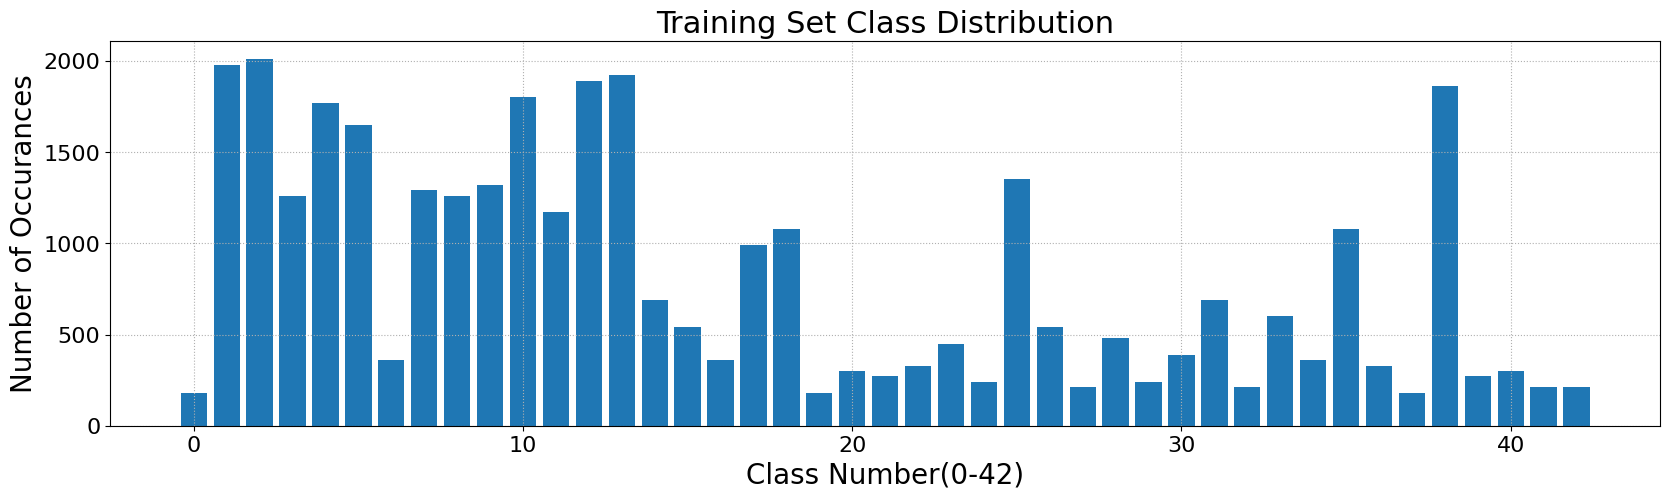

In [ ]:
#Plot to show frequencies of data for Training dataset
plt.figure(0, figsize = (20,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


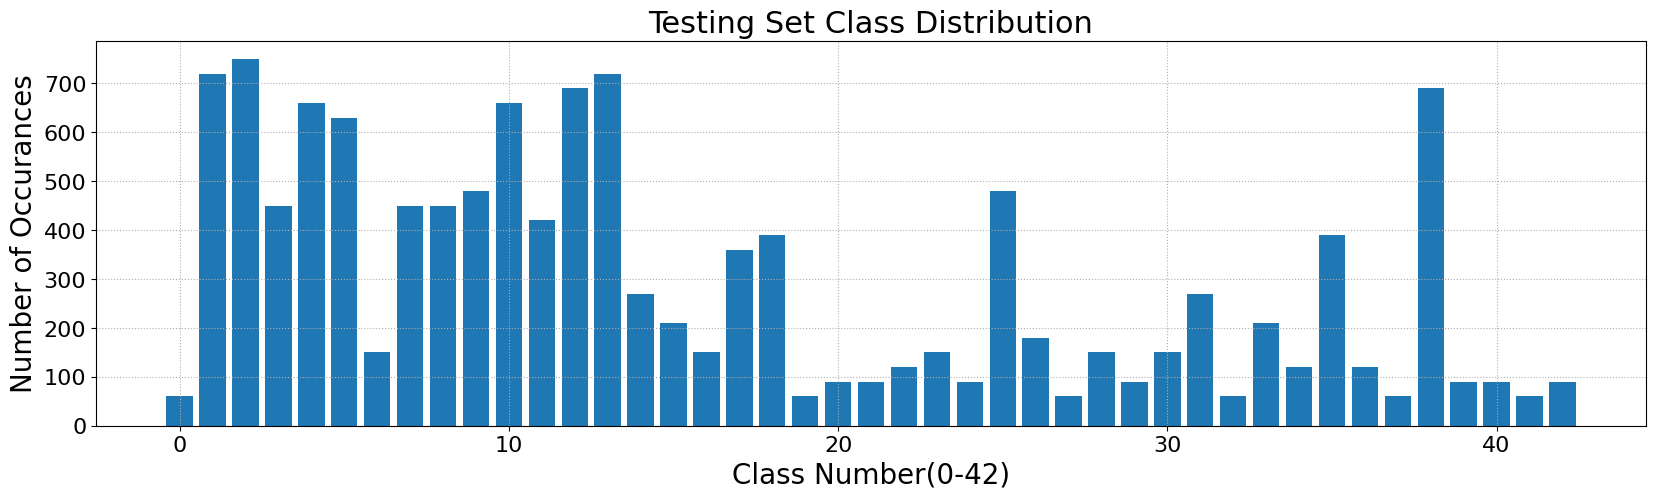

In [ ]:
#Plot to show frequencies of data for Testing dataset
plt.figure(0, figsize = (20,5))
unique_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_test, counts_test)

plt.title('Testing Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


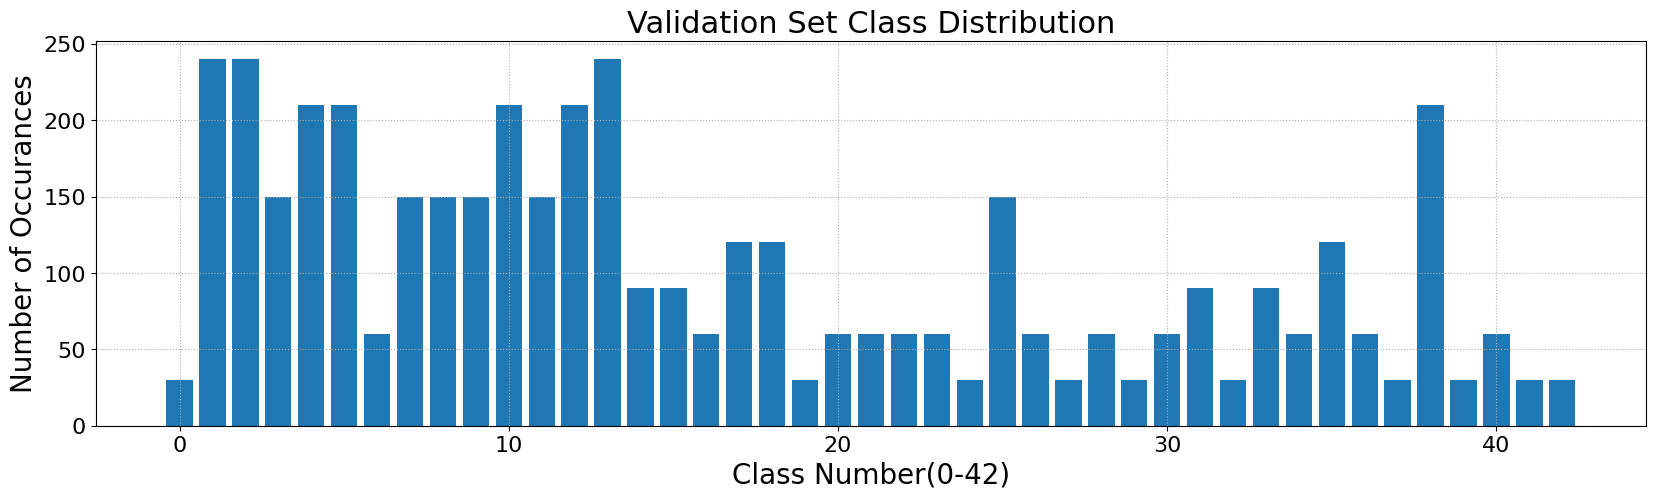

In [ ]:
#Plot to show frequencies of data for Validation dataset
plt.figure(0, figsize = (20,5))
unique_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_valid, counts_valid)

plt.title('Validation Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


### Visualiser toutes les classes d'images

0 . Class :  Limitation de vitesse (20km/h)


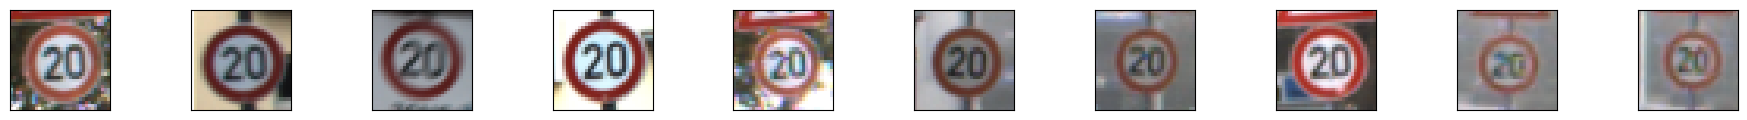

1 . Class :  Limitation de vitesse (30km/h)


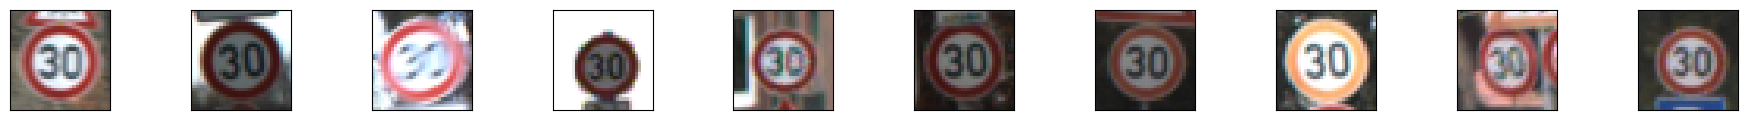

2 . Class :  Limitation de vitesse (50km/h)


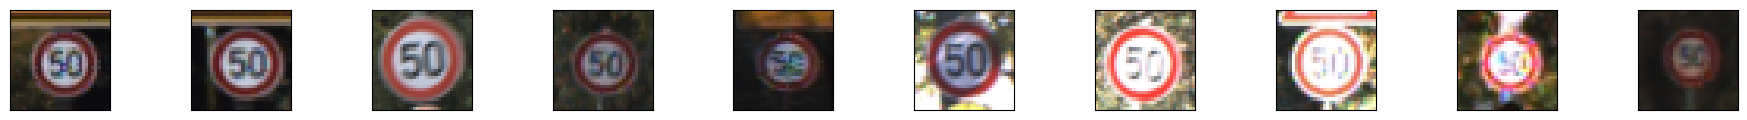

3 . Class :  Limitation de vitesse (60km/h)


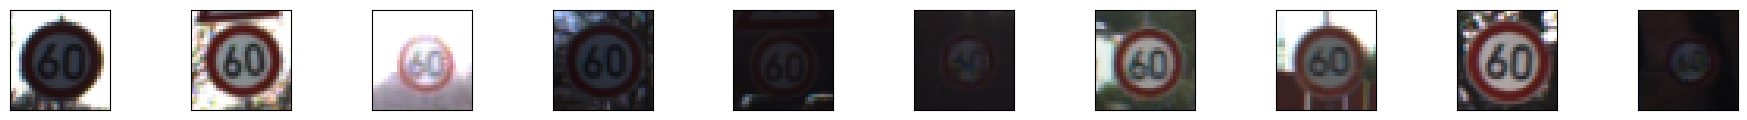

4 . Class :  Limitation de vitesse (70km/h)


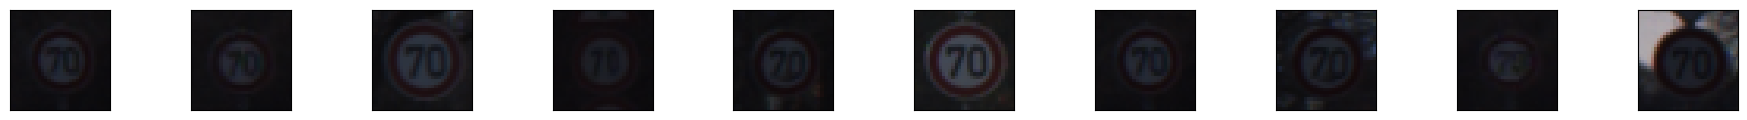

5 . Class :  Limitation de vitesse (80km/h)


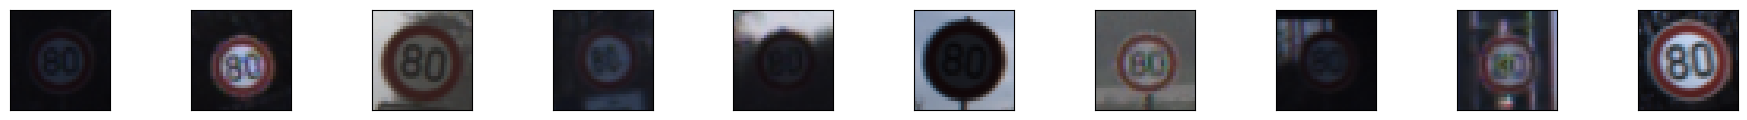

6 . Class :  Fin de limite de vitesse (80km/h)


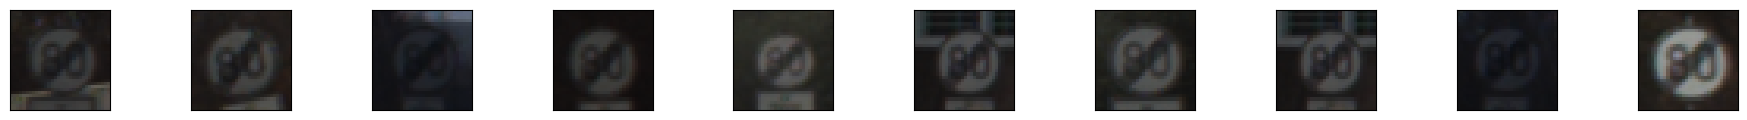

7 . Class :  Limitation de vitesse (100km/h)


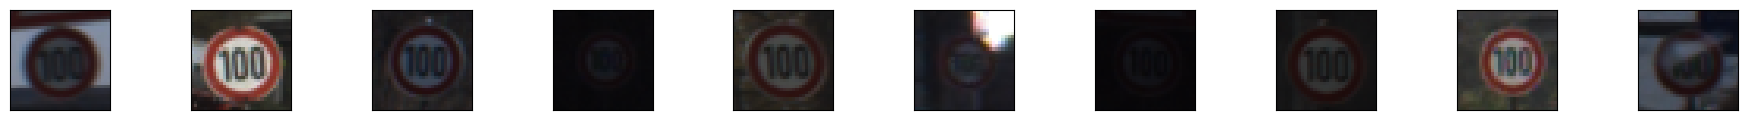

8 . Class :  Limitation de vitesse (120km/h)


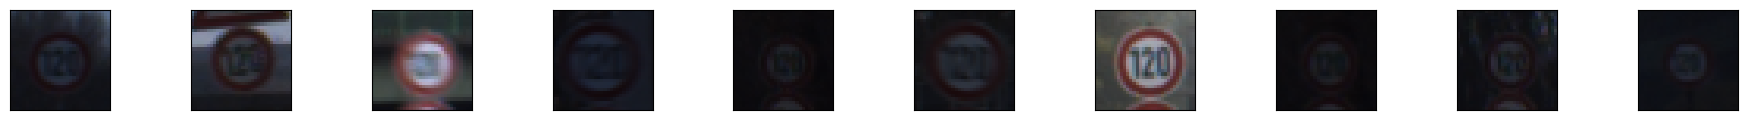

9 . Class :  Dépassement interdit


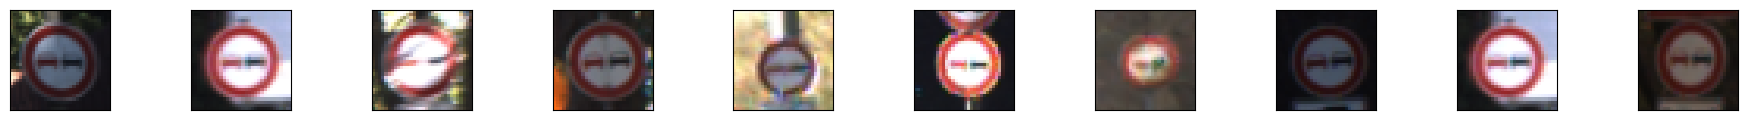

10 . Class :  Dépassement interdit pour les véhicules de plus de 3.5tonnes


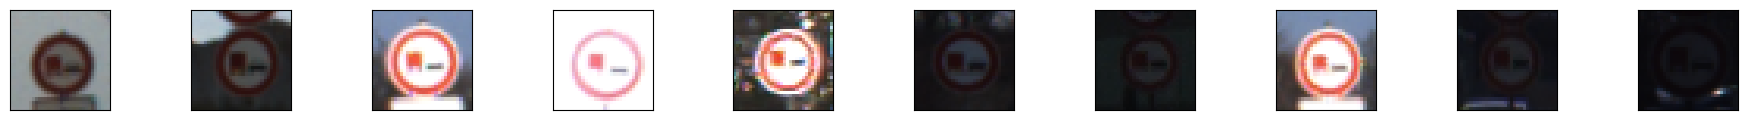

11 . Class :  Droit de passage à la prochaine intersection


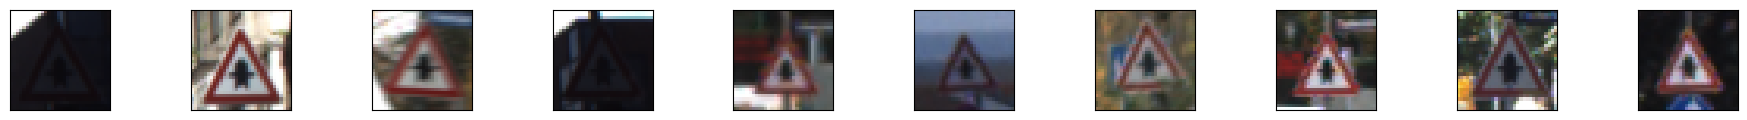

12 . Class :  Route prioritaire


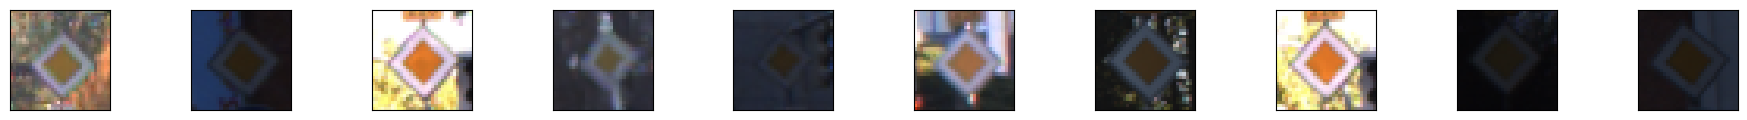

13 . Class :  Rendement


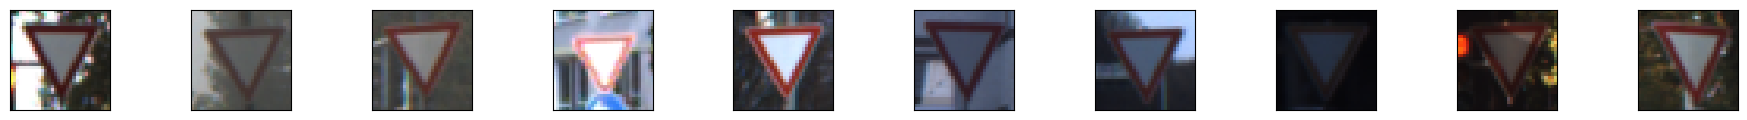

14 . Class :  Stop


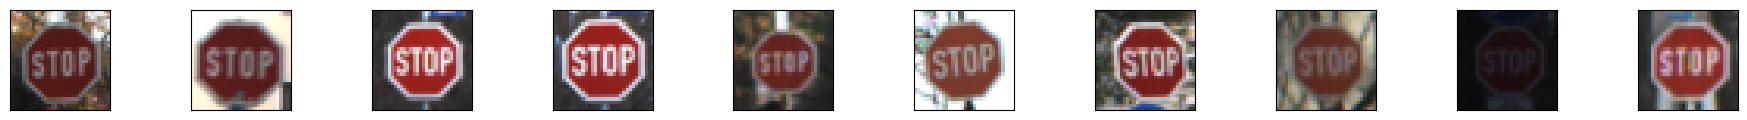

15 . Class :  Pas de véhicules


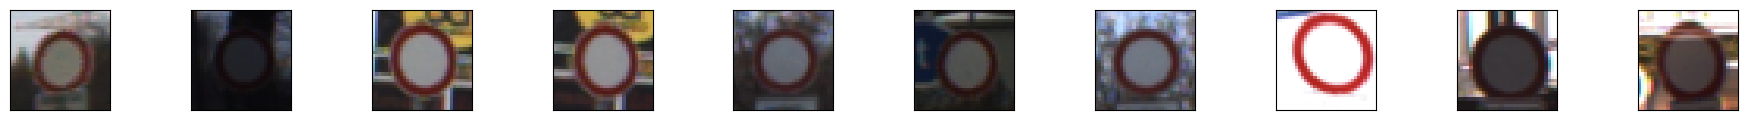

16 . Class :  Véhicules de plus de 3.5 tonnes interdits


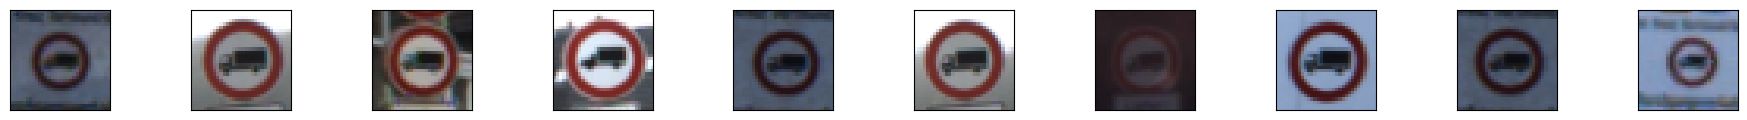

17 . Class :  Entrée interdite


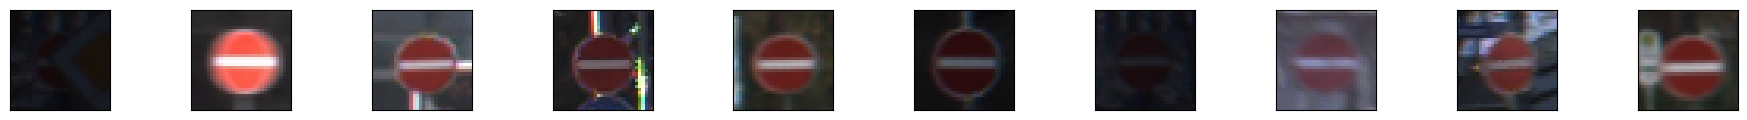

18 . Class :  Prudence générale


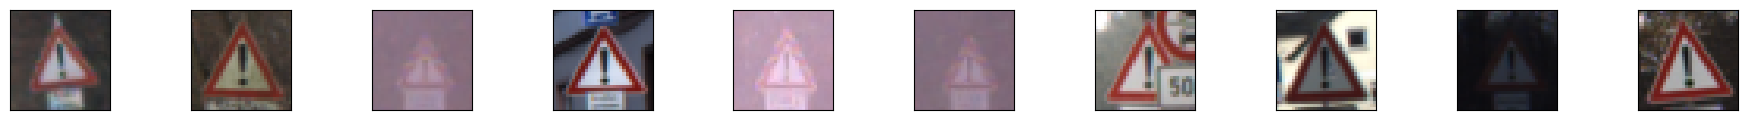

19 . Class :  Virage dangereux à gauche


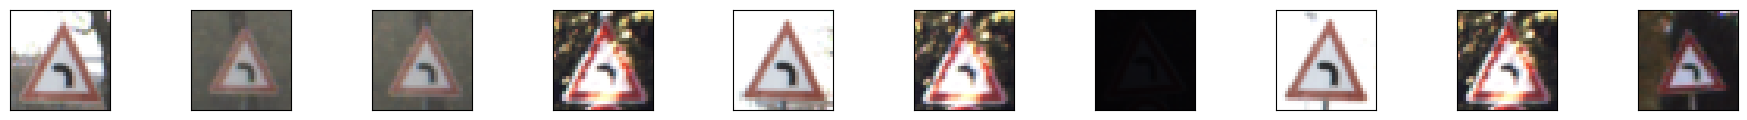

20 . Class :  Virage dangereux à droite


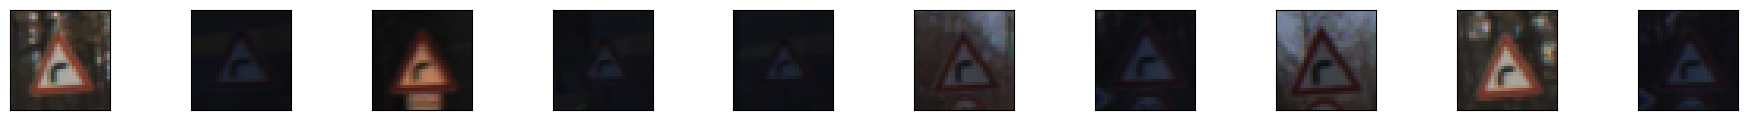

21 . Class :  Double virage


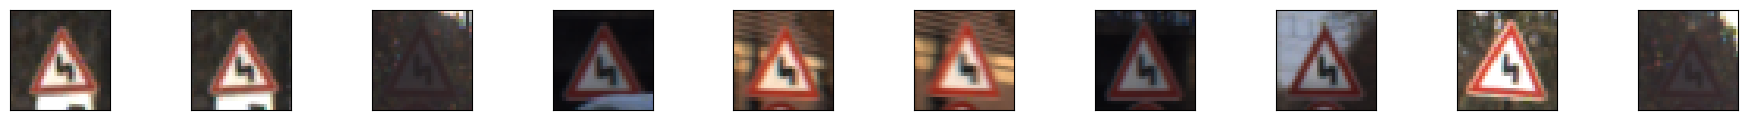

22 . Class :  Route cahouteuse


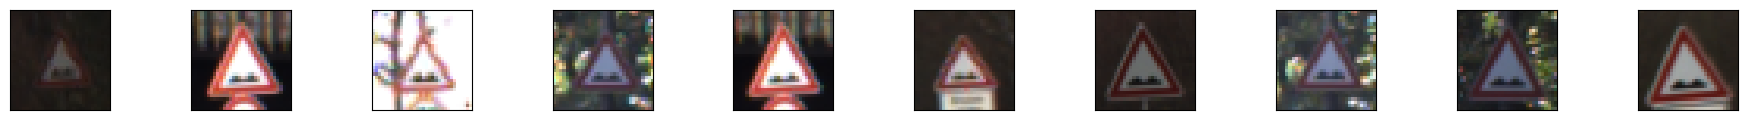

23 . Class :  Route glissante


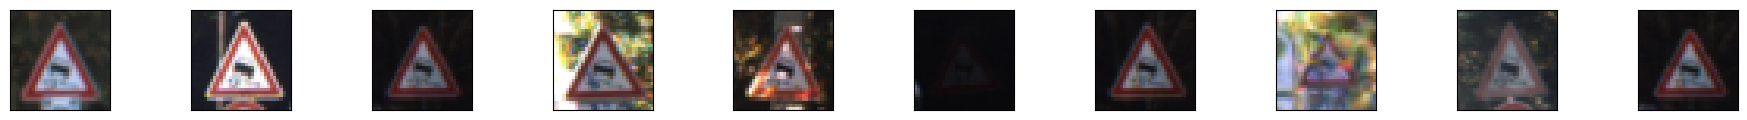

24 . Class :  La route se rétrécit à droite


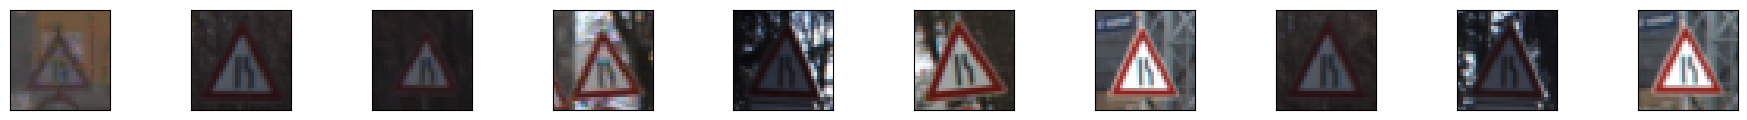

25 . Class :  Travaux routiers


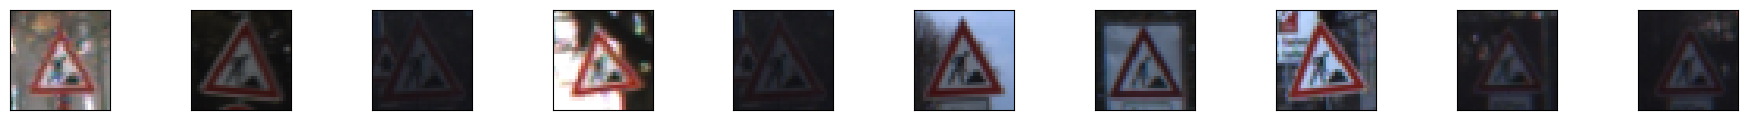

26 . Class :  Feux de circulations


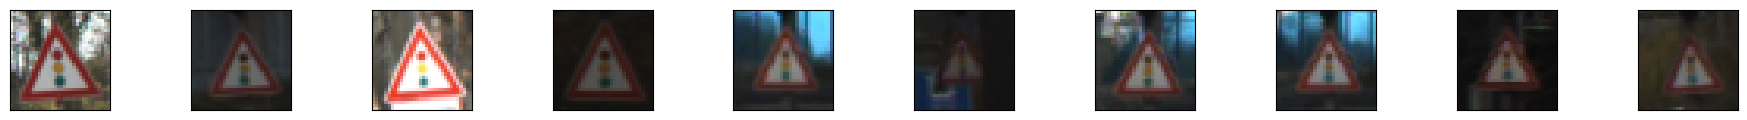

27 . Class :  Piétons


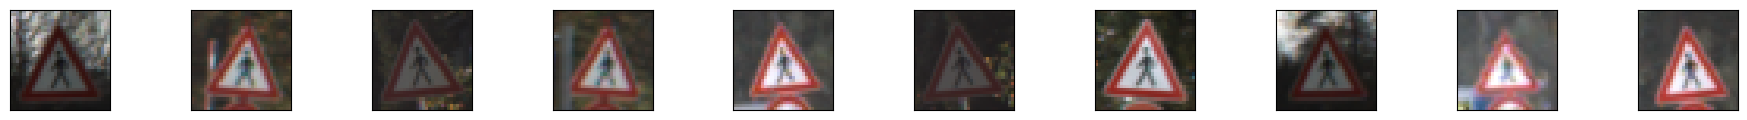

28 . Class :  Passage des enfants


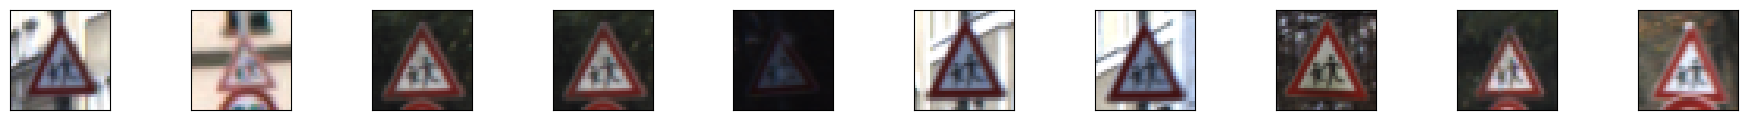

29 . Class :  Passage à vélo


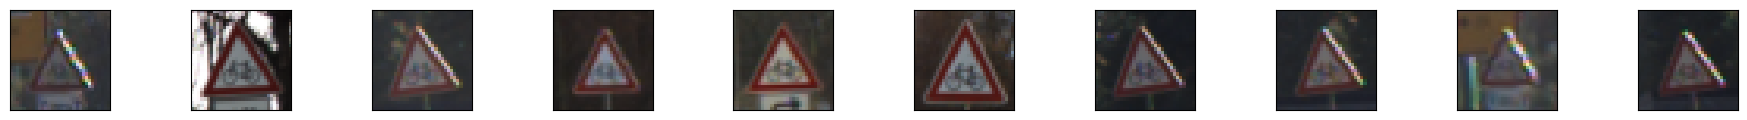

30 . Class :  Attention au verglas/neige


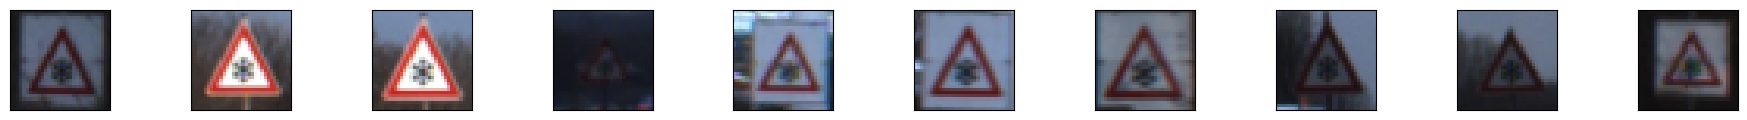

31 . Class :  Traversée d animaux sauvages


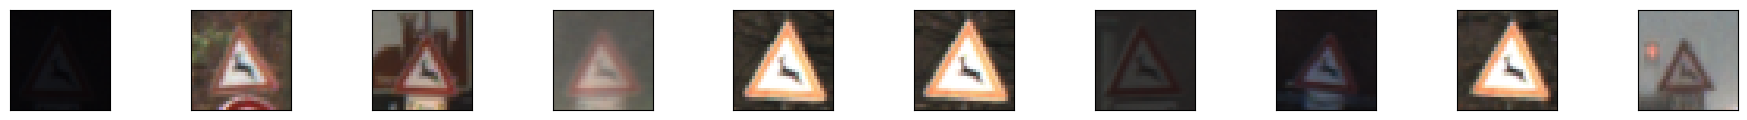

32 . Class :  Fin de toutes les limites de vitesse et de dépassement


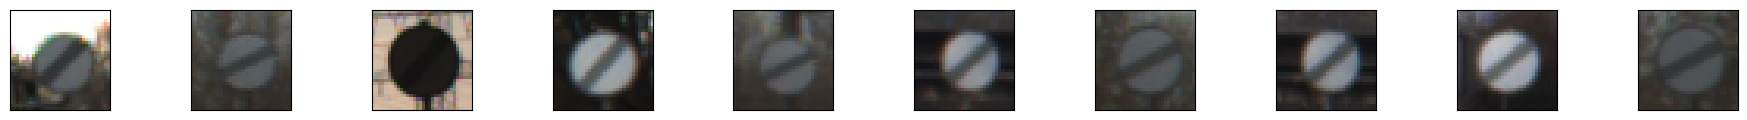

33 . Class :  Tourner à droite


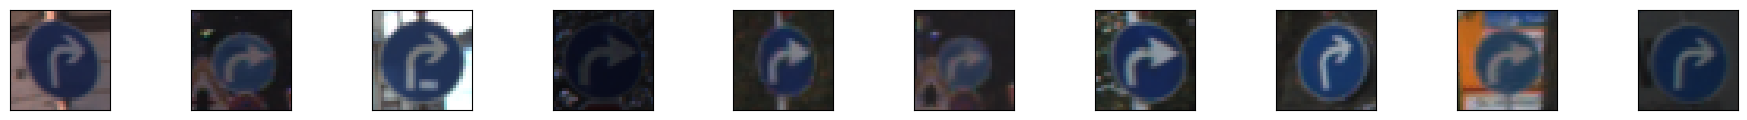

34 . Class :  Tourner à gauche


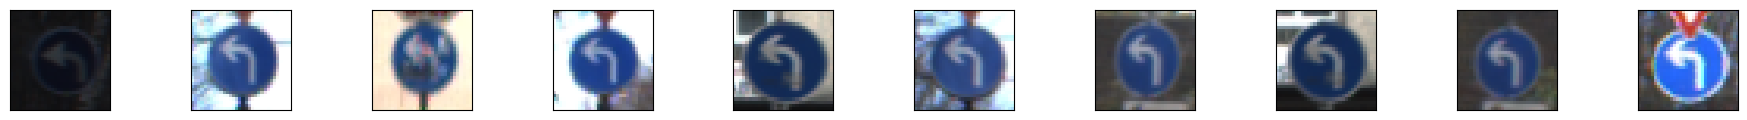

35 . Class :  Devant seulement


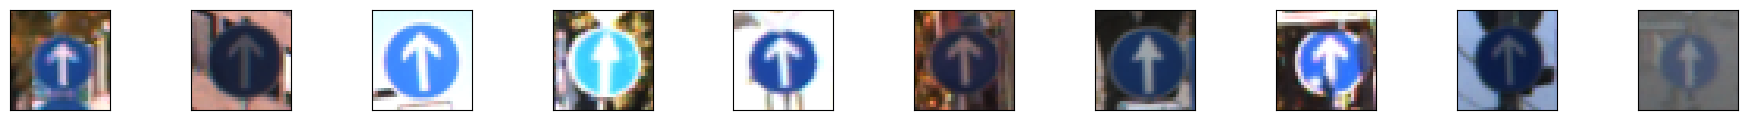

36 . Class :  Aller tout droit ou à dtoite


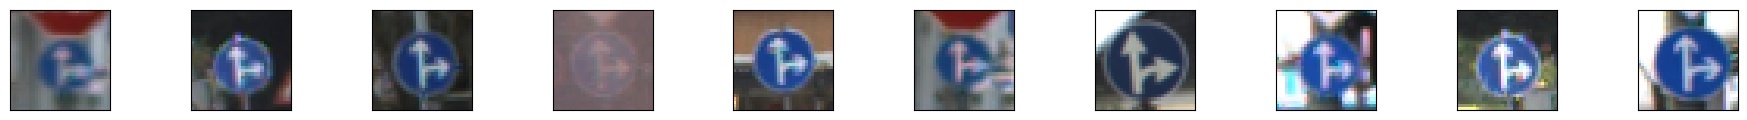

37 . Class :  Aller tout droit ou à gauche


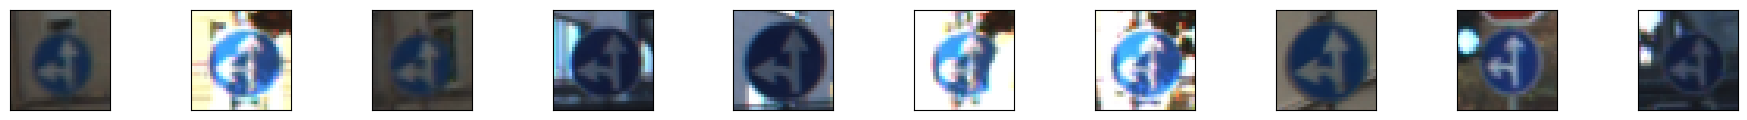

38 . Class :  Rester à droite


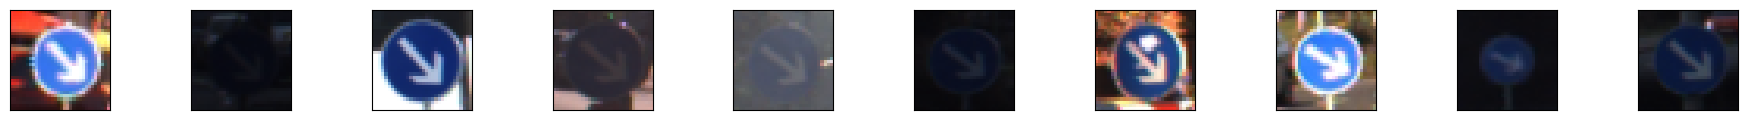

39 . Class :  Rester à gauche


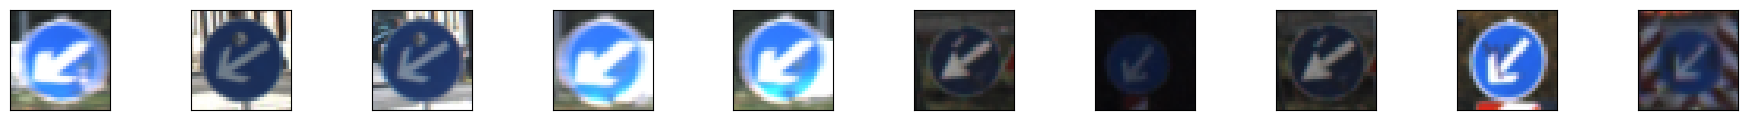

40 . Class :  Rond-point obligatoire


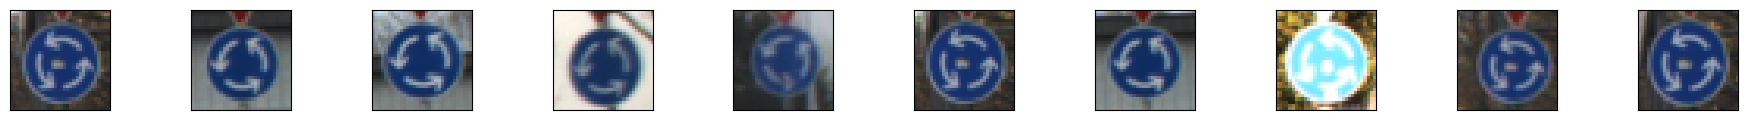

41 . Class :  Fin de non-passage


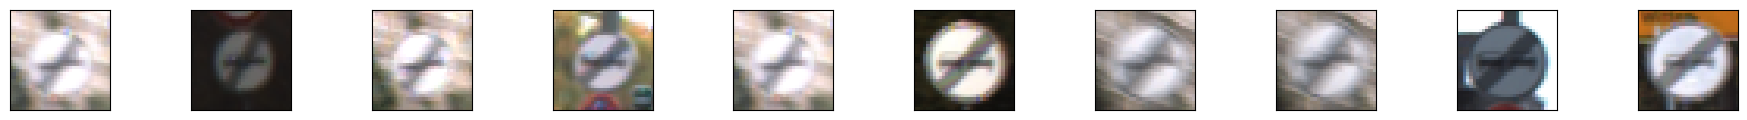

42 . Class :  Fin de non-passage des véhicules de plus de 3.5 tonnes


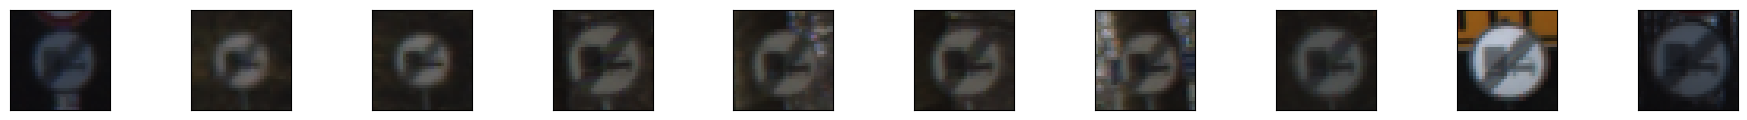

In [ ]:
#Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c] )
    fig = pyplot.figure(figsize = (18, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(X_train[random_indices[i],:,:,:])
        #axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)

    pyplot.show()

### Bref aperçu visuel de l'ensemble de données

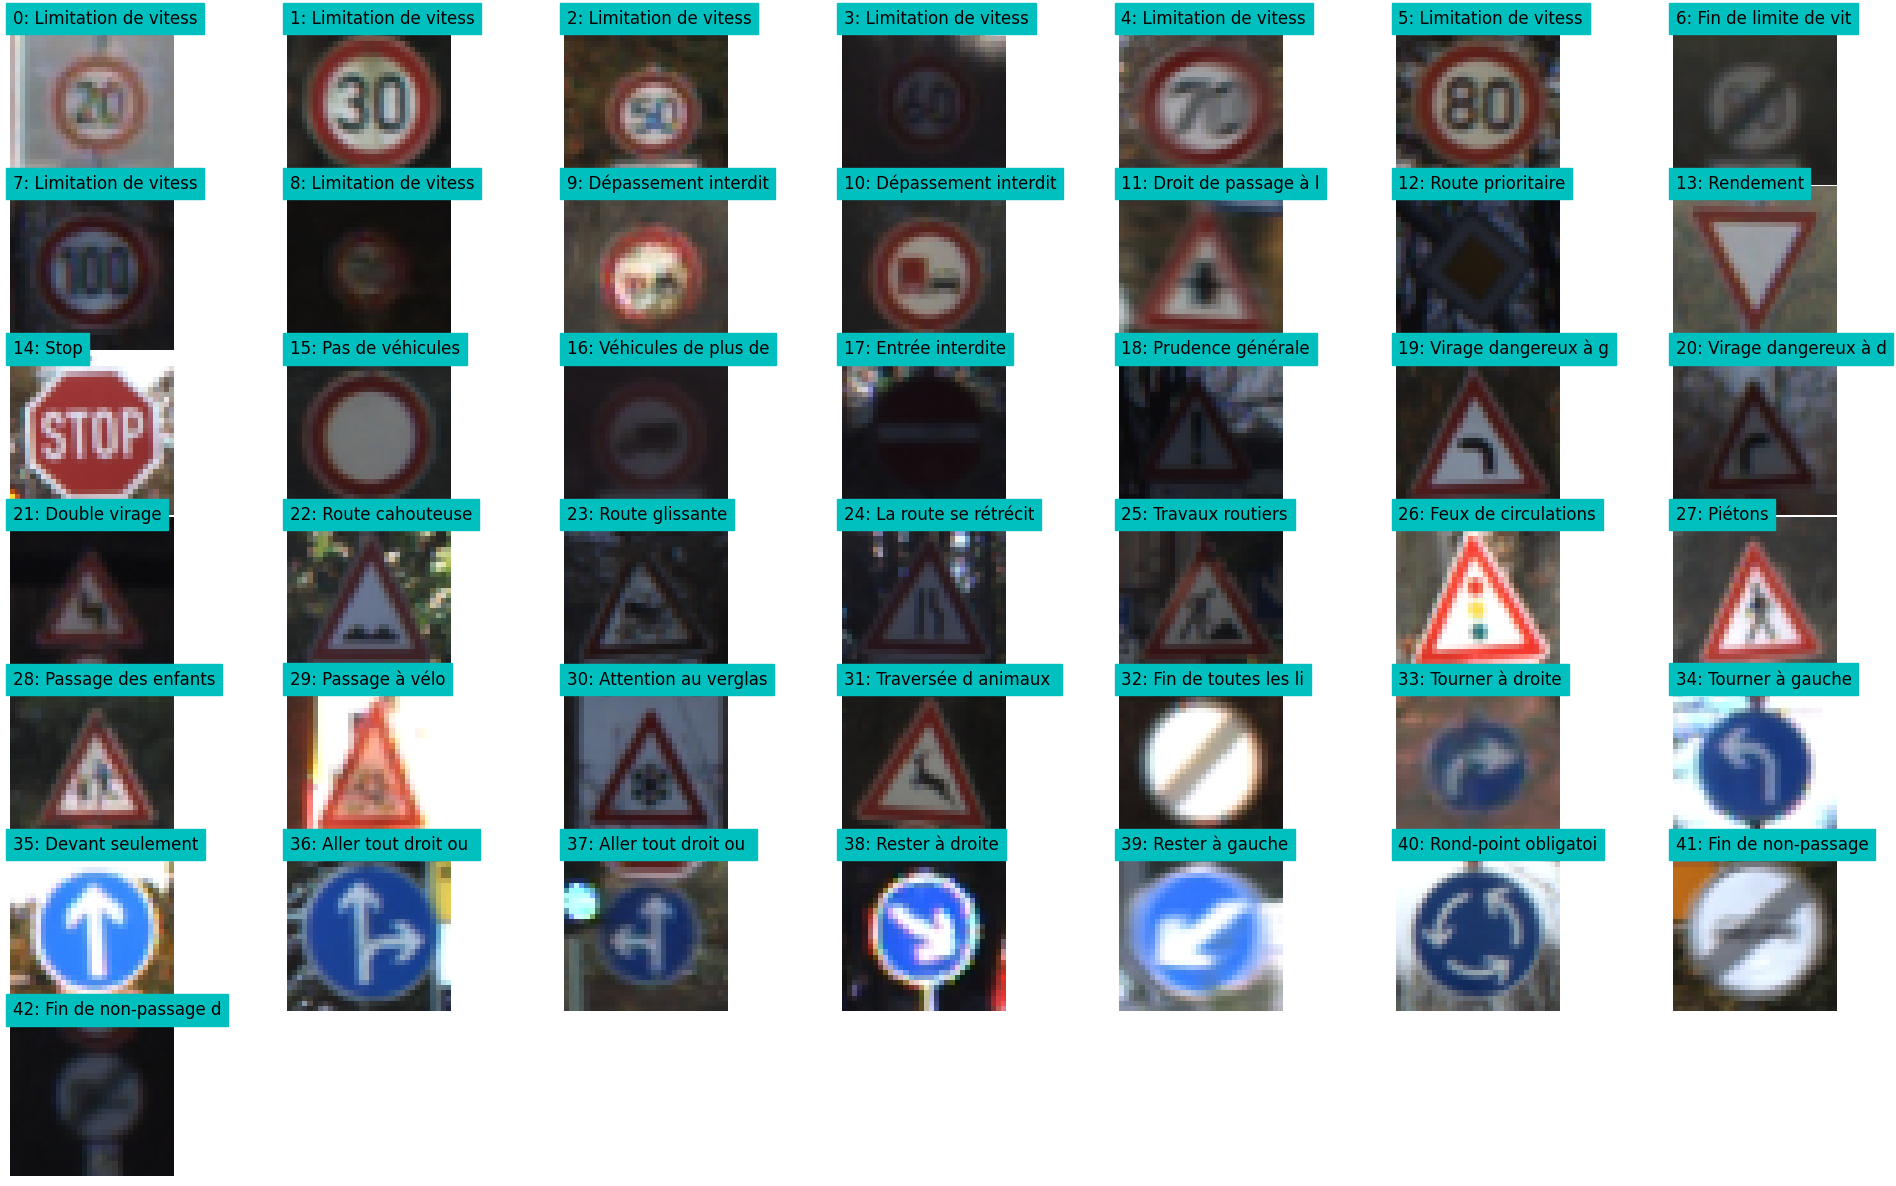

In [ ]:
#Showing Random image datasets for each class
def plot_random_each_class(n_row,n_col,X,y):

    plt.figure(figsize = (25,15))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes.

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X[ind_plot])
        #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)

        plt.axis('off')
    plt.show()

plot_random_each_class(7,7,X_train,y_train)


## Augmentation des données


Étant donné que la distribution des classes sur l'ensemble de données est extrêmement déséquilibrée, nous pouvons utiliser l'augmentation des données pour créer davantage d'ensembles de données, car des ensembles de données déséquilibrés entraîneront un grand nombre de biais dans le processus d'apprentissage.



In [ ]:
!pip install opencv-python

In [ ]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def rotate_image(image, max_angle =15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans = 5, height=32, width=32):
    translate_x = max_trans*np.random.uniform() - max_trans/2
    translate_y = max_trans*np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height,width))
    return trans

def projection_transform(image, max_warp=0.8, height=32, width=32):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)

    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin

    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image


def transform_image(image, max_angle=15, max_trans =5 ,max_warp=0.8):
    ## Simple pipline to take an input image and apply a serise of simple
    ## Distortions to augment the training data set
    ## (note: this function will rescale pixel values between 0-1)
    ##
    height, width, channels = image.shape
    #Rotate Image
    rotated_image = rotate_image(image, max_angle)
    #Translate Image
    translated_image = translate_image(rotated_image, max_trans, height, width)
    #Project Image
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image*255.0).astype(np.uint8)


def augment_and_balance_data(X_train, y_train, no_examples_per_class =5000):

    n_examples = no_examples_per_class
    #Get paramters of data
    classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
    height, width, channels = X_train[0].shape


    #Create new data and labels for the balanced augmented data
    X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    y_balance = np.empty([0], dtype = y_train.dtype)


    for c, count in zip(range(n_classes), class_counts):
        ##Copy over the current data for the given class
        X_orig = X_train[y_train == c]
        y_orig = y_train[y_train == c]
        ##Add original data to the new dataset
        X_balance = np.append(X_balance, X_orig, axis=0)
        print(c,count)
        temp_X = np.empty([n_examples-count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
        for i in range(n_examples - count):
            temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))


        X_balance = np.append(X_balance,temp_X, axis=0)
        n_added_ex = X_balance.shape[0] - y_balance.shape[0]
        y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype =int))


    return X_balance.astype(np.uint8), y_balance



### Augmentation des données par rotation


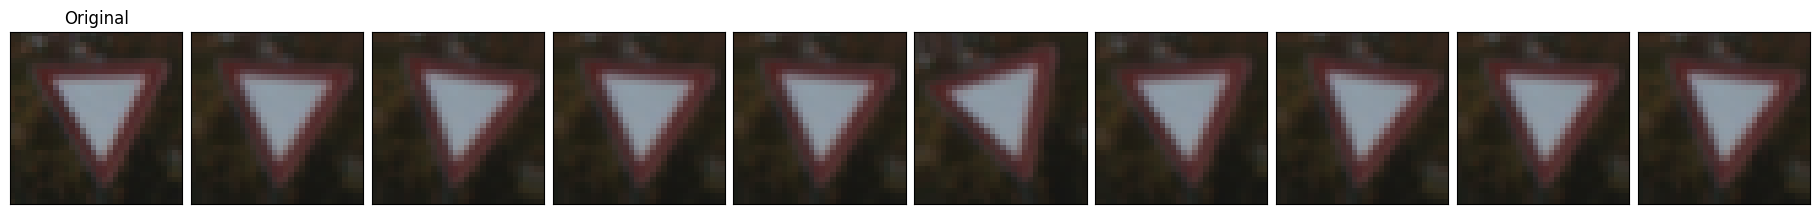

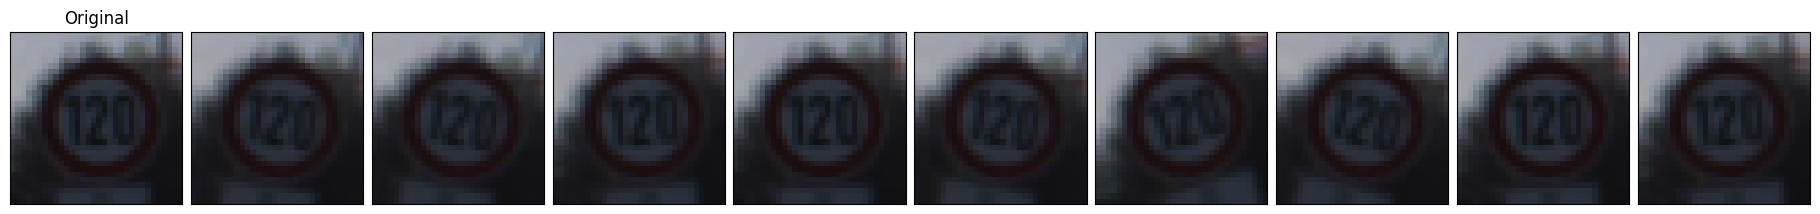

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(rotate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Augmentation des données par translation

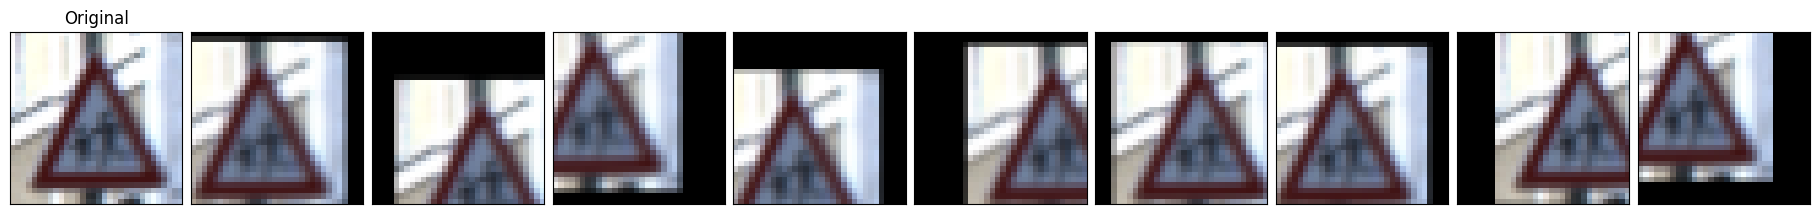

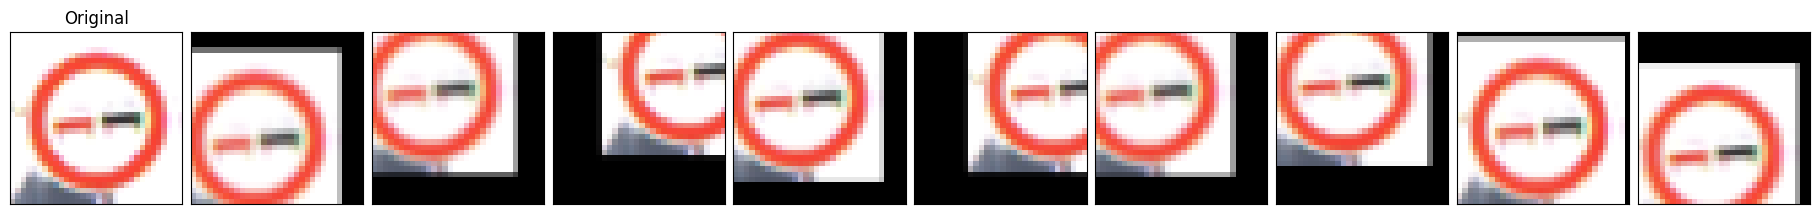

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(translate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Augmentation des données par projection homographique

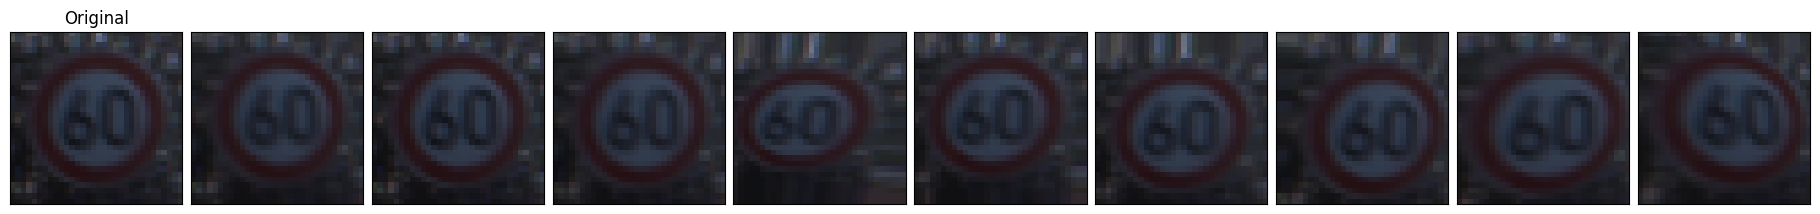

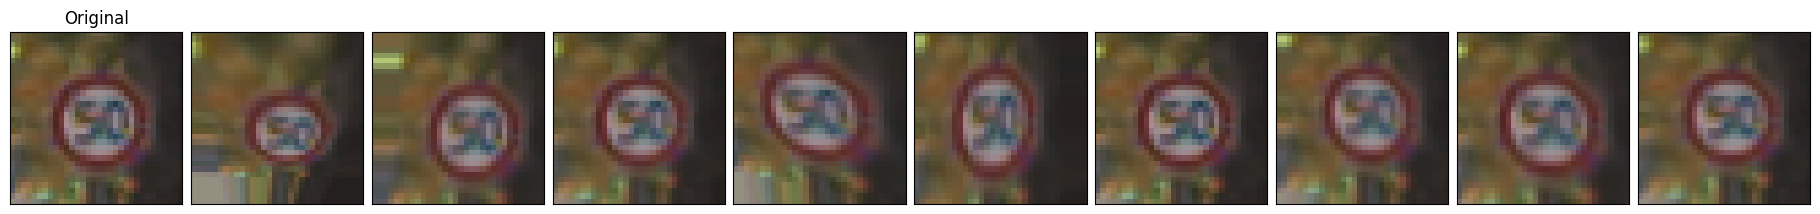

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(projection_transform(X_train[image[j],:,:,:]))
    pyplot.show()

### Pipeline pour l'augmentation des données

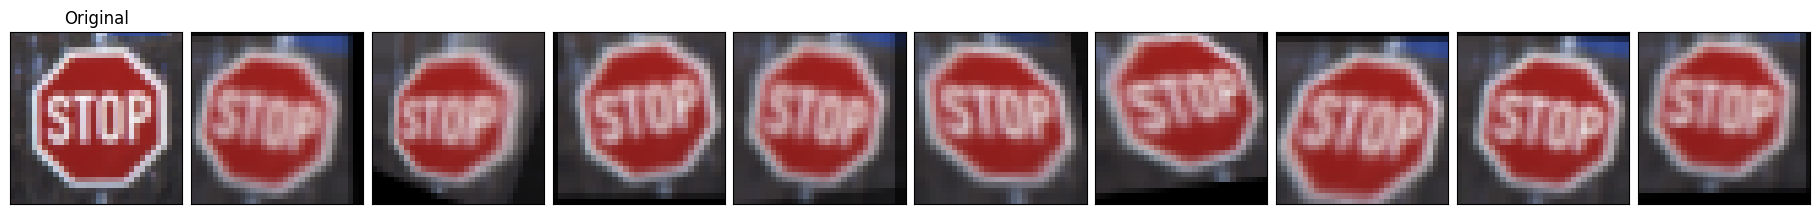

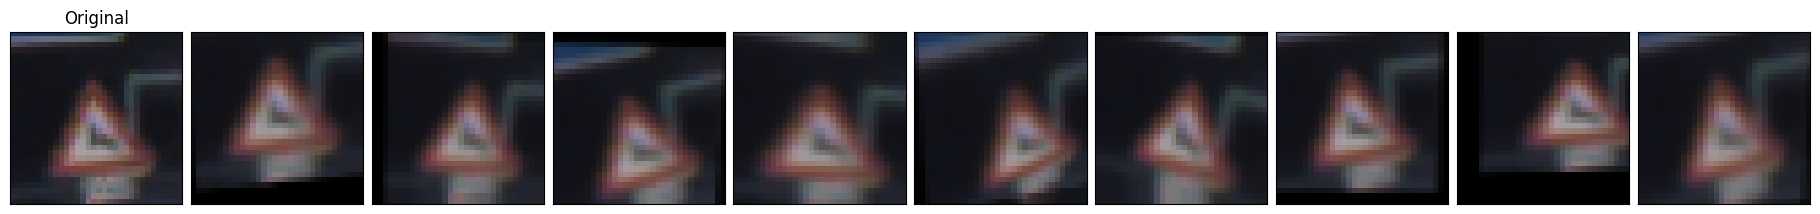

In [ ]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(transform_image(X_train[image[j],:,:,:]))
    pyplot.show()

### Générer ou charger un ensemble de données augmentées

In [ ]:
####Only Run to generate Augmented data

#X_out, y_out = augment_and_balance_data(X_train, y_train, 5000)
#np.savez_compressed('/content/drive/MyDrive/Datasets/Augmented_Data/AugTrafficdata', X_train_aug = X_out, y_train_aug = y_out)

In [ ]:
##Load augmented data

#loaded = np.load('Datasets/Augmented_Data/AugTrafficdata.npz')
#X_train_aug = loaded['X_train_aug']
#y_train_aug = loaded['y_train_aug']
#print("Augmented Dataset size X", X_train_aug.shape)
#print("Augmented Dataset size y", y_train_aug.shape)



## Architectures de classification profonde


Nous considérerons les architectures de réseaux neuronaux convolutifs AlexNet pour ce défi.
AlexNet (2012)(Style CIFAR10) :  Architecture classique avec des couches supplémentaires de normalisation par lots pour faciliter l'apprentissage.

  1. Les couches de convolution sont utilisées pour extraire des caractéristiques spécifiques des images en appliquant des filtres. Ces couches apprennent simultanément plusieurs caractéristiques à partir de l'entrée et les utilisent pour la classification des images.

  2. Les couches de Pooling sont utiliser pour reduire la taille de vecteur de caracteristiquer.

  3. Les couches BatchNormalization sont utilisées pour normaliser les données, ce qui permet d'éviter l'ajustement excessif du modèle.

  4. The Flatten layer convertit les données multidimensionnelles en un format unidimensionnel, ce qui permet de les introduire dans des couches denses entièrement connectées

  5. Les couches entièrement connectées(Fully connected layers) établissent des connexions entre tous les neurones d'entrée et de sortie.

  6. Stride est un paramètre des réseaux neuronaux convolutionnels qui détermine la quantité de mouvement sur les images ou les données vidéo pendant le filtrage.

  7. Padding dans les réseaux neuronaux convolutifs, le padding désigne les pixels supplémentaires ajoutés à une image lorsqu'elle est traitée par le noyau, ce qui facilite les opérations d'un CNN.

### Tensorflow Installation

In [ ]:
!pip install tensorflow

## Prétraitement des données

In [ ]:
from sklearn.utils import shuffle

## Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Convert RGB images to grayscale for the training set
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the testing set
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the validation set
X_validation_gray  = np.sum(X_valid/3, axis=3, keepdims=True)


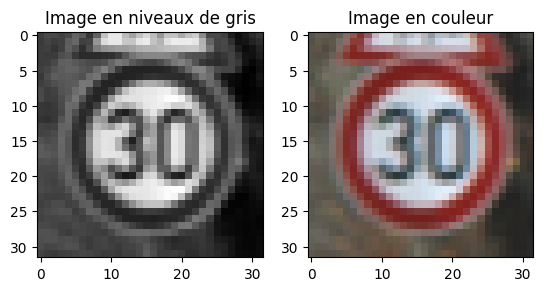

In [ ]:
import matplotlib.pyplot as plt

# Affichage d'une image en niveaux de gris et en couleur
index = 0  # Choisissez l'indice de l'image à afficher

# Affichage de l'image en niveaux de gris
plt.subplot(1, 2, 1)
plt.imshow(X_train_gray[5].squeeze(), cmap='gray')
plt.title('Image en niveaux de gris')

# Affichage de l'image en couleur
plt.subplot(1, 2, 2)
plt.imshow(X_train[5])
plt.title('Image en couleur')

plt.show()

In [ ]:
# Normalize the training set of grayscale images
X_train_gray_norm = (X_train_gray - 32) / 32

# Normalize the test set of grayscale images
X_test_gray_norm = (X_test_gray - 32) / 32

# Normalize the validation set of grayscale images
X_validation_gray_norm = (X_validation_gray - 32) / 32


In [ ]:
# Onehot Encoding the labels.
from tensorflow.keras.utils import to_categorical

# Store the original labels for future reference
y_train_unchanged = y_train
y_validation_unchanged = y_valid
y_test_unchanged = y_test
# Perform Onehot Encoding on the labels
# Convert the labels from integer representation to binary matrix representation
y_train = to_categorical(y_train)
y_validation = to_categorical(y_valid)
y_test = to_categorical(y_test)


In [ ]:
# Shape of Train dataset
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

In [ ]:
# Shape of Test dataset
X_test.shape

(12630, 32, 32, 3)

In [ ]:
# Shape of Validation dataset
X_valid.shape

(4410, 32, 32, 3)

## Model Architecture -1 : ALEXNET

Le code met en œuvre AlexNet, une architecture de réseau neuronal convolutif utilisée pour la classification d'images. Il utilise Keras pour construire le modèle, qui se compose de couches convolutives, entièrement connectées et d'activation. Le réseau est conçu pour classer les images en 43 classes différentes.

AlexNet commence par des couches convolutives suivies d'une normalisation par lots et de fonctions d'activation. Le regroupement maximal est utilisé pour réduire l'échantillonnage des cartes de caractéristiques. L'entrée aplatie passe par des couches entièrement connectées avec une régularisation de type "dropout" pour éviter le surajustement. La couche de sortie finale utilise l'activation softmax pour la classification multiclasse. Le résumé du modèle fournit un aperçu détaillé des couches et de leurs paramètres.

En résumé, le code définit un puissant modèle de classification d'images, AlexNet, à l'aide de Keras. Il incorpore des couches convolutives et entièrement connectées, ainsi que des fonctions d'activation et une normalisation par lots.
Le modèle est capable de classer les images en plusieurs classes, et le résumé donne un aperçu de sa structure.

In [ ]:
# Define the architecture of AlexNet
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

# Create a Sequential model
AlexNet = Sequential()

# Add the 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# Add the 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Print the model summary
AlexNet.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          11712     
                                                                 
 batch_normalization_8 (Bat  (None, 8, 8, 96)          384       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_9 (Bat  (None, 4, 4, 256)        

In [ ]:
# Calculer la taille du sous-ensemble (50%)
#subset_size = int(len(X_train_gray_norm) * 0.5)

# Sélectionner un sous-ensemble aléatoire de données d'entraînement et de validation
#X_train_subset = X_train_gray_norm[:subset_size]
#y_train_subset = y_train[:subset_size]

#X_validation_subset = X_validation_gray_norm[:subset_size]
#y_validation_subset = y_validation[:subset_size]

# Compiler le modèle AlexNet avec une perte catégorielle cross-entropy, un optimiseur SGD et une métrique d'exactitude
#AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Entraîner le modèle AlexNet sur le sous-ensemble de données d'entraînement, pour un total de 20 époques, avec le sous-ensemble de données de validation pour surveiller les performances
#history = AlexNet.fit(X_train_subset, y_train_subset, epochs=20, validation_data=(X_validation_subset, y_validation_subset))


# Compile the AlexNet model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the AlexNet model on the training data, for a total of 20 epochs, with validation data for monitoring performance
# X_train_gray_norm and y_train represent the preprocessed and normalized training data
# X_validation_gray_norm and y_validation represent the preprocessed and normalized validation data
history = AlexNet.fit(X_train_gray_norm, y_train, epochs=50, validation_data=(X_validation_gray_norm, y_validation))






Epoch 1/50
1088/1088 [==============================] - 18s 13ms/step - loss: 2.4867 - accuracy: 0.3722 - val_loss: 2.0072 - val_accuracy: 0.4680
Epoch 2/50
1088/1088 [==============================] - 14s 13ms/step - loss: 1.2052 - accuracy: 0.7069 - val_loss: 1.5650 - val_accuracy: 0.6093
Epoch 3/50
1088/1088 [==============================] - 14s 13ms/step - loss: 0.8050 - accuracy: 0.8110 - val_loss: 0.9915 - val_accuracy: 0.7200
Epoch 4/50
1088/1088 [==============================] - 14s 13ms/step - loss: 0.5942 - accuracy: 0.8617 - val_loss: 0.8983 - val_accuracy: 0.7624
Epoch 5/50
1088/1088 [==============================] - 14s 13ms/step - loss: 0.4675 - accuracy: 0.8958 - val_loss: 1.1200 - val_accuracy: 0.7166
Epoch 6/50
1088/1088 [==============================] - 14s 13ms/step - loss: 0.3695 - accuracy: 0.9207 - val_loss: 0.8355 - val_accuracy: 0.7712
Epoch 7/50
1088/1088 [==============================] - 14s 13ms/step - loss: 0.3086 - accuracy: 0.9337 - val_loss: 1.2179 -

In [ ]:
import tensorflow as tf

# Save the model
AlexNet.save("Best_AlexNet.h5")

#Loading Saved model
New_model1 = tf.keras.models.load_model('Best_AlexNet.h5')

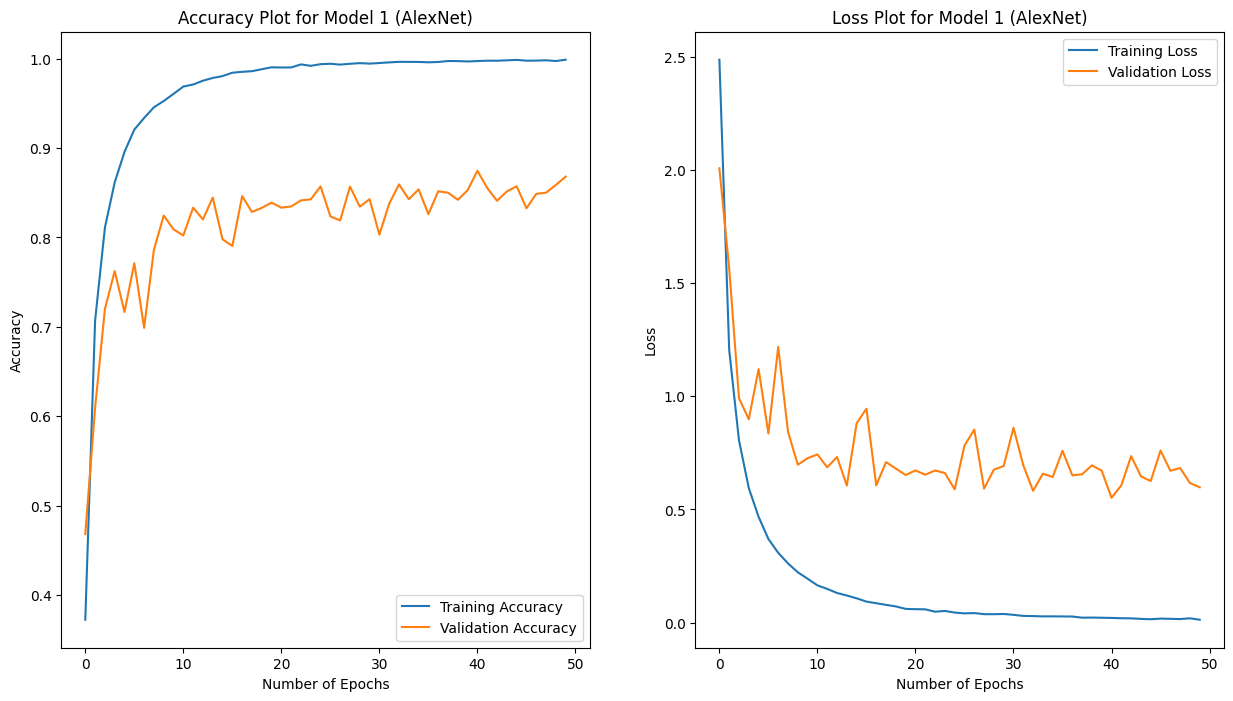

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 1 (AlexNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 1 (AlexNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 1 Evaluation & Report

In [ ]:
New_model1.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.5805 - accuracy: 0.8717


[0.5804839730262756, 0.8717339634895325]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = New_model1.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 1 (AlexNet):")
print(classification_rep)


395/395 [==============================] - 2s 4ms/step

Classification Report for Model 1 (AlexNet):
              precision    recall  f1-score   support

           0       0.87      0.33      0.48        60
           1       0.94      0.91      0.93       720
           2       0.89      0.91      0.90       750
           3       0.62      0.88      0.72       450
           4       0.87      0.83      0.85       660
           5       0.78      0.91      0.84       630
           6       0.98      0.83      0.90       150
           7       0.83      0.78      0.81       450
           8       0.82      0.88      0.85       450
           9       0.87      0.87      0.87       480
          10       0.95      0.96      0.95       660
          11       0.84      0.95      0.90       420
          12       0.95      0.95      0.95       690
          13       0.99      0.99      0.99       720
          14       0.98      0.87      0.92       270
          15       0.94      0.95 

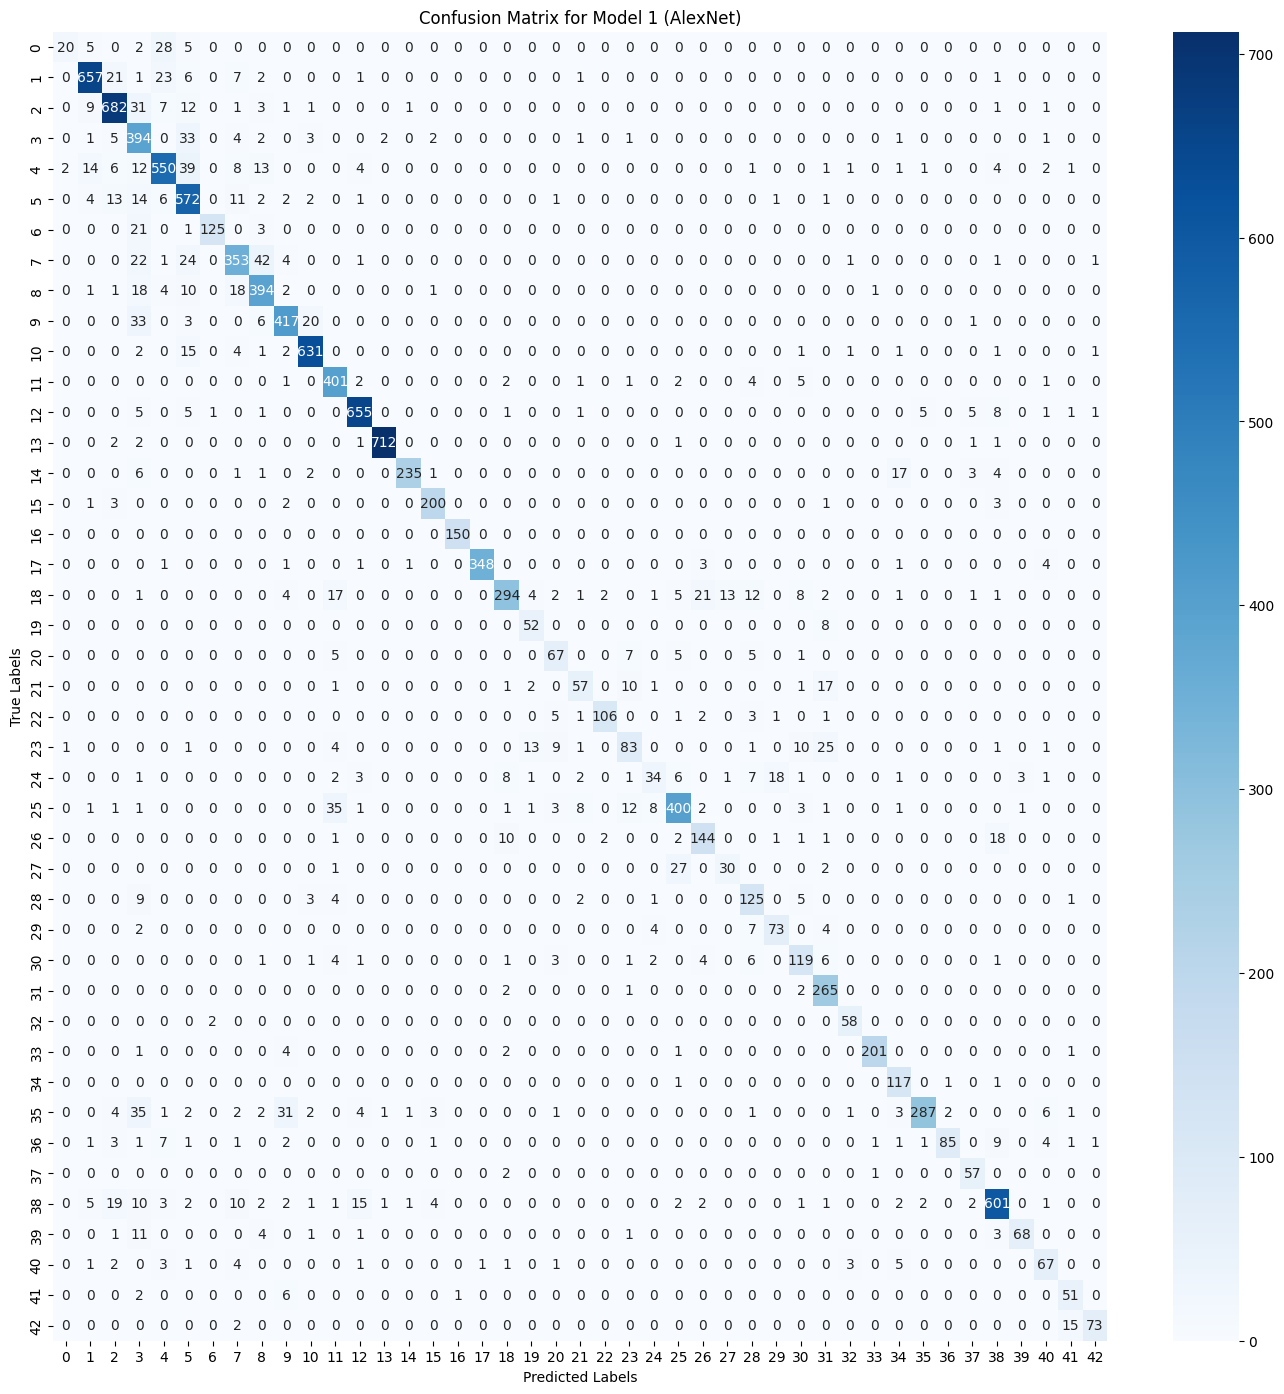

In [ ]:


# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 1 (AlexNet)')
plt.show()


## Model Architecture -2 : DenseNET

 Modification des hyperparamètres : Le deuxième modèle intègre des modifications des hyperparamètres. Il comprend des rappels d'arrêt anticipé et de vérification du modèle, qui permettent d'optimiser le processus d'apprentisage en surveillant la perte de validation et en sauvegardant le meilleur modèle.

  Calcul des poids de classe : Le deuxième modèle calcule et applique des poids de classe pour gérer le déséquilibre des classes. Il calcule les poids de classe sur la base de la distribution des données d'apprentissage et attribue des poids plus élevés aux classes sous-représentées.

  Rappels de formation : Le deuxième modèle utilise le rappel d'arrêt précoce pour arrêter la formation lorsque la perte de validation cesse de s'améliorer. Cela permet d'éviter le surajustement et d'améliorer la généralisation.

Dans l'ensemble, le modèle ci-dessous introduit des stratégies de formation améliorées, telles que la pondération des classes et l'arrêt anticipé, afin d'améliorer les performances et de résoudre les problèmes de déséquilibre des classes.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.densenet import DenseNet121
#from keras.layers.convolutional import Conv2D
from keras.layers import Conv2D
import numpy as np

np.random.seed(1000)

# Create a Sequential model
model = Sequential()

# Add the 1st Convolutional Layer to expand single-channel input to three channels
model.add(Conv2D(filters=3, kernel_size=(1, 1), input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add the DenseNet121 base model
base_model = DenseNet121(include_top=False, input_shape=(32, 32, 3))
model.add(base_model)

# Flatten the input
model.add(Flatten())

# Add the 1st Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the Output layer
model.add(Dense(43))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Print the model summary
model.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 3)         6         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 3)         12        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 3)         0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 4096)              41

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the AlexNet model with specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with the specified training data, validation data, callbacks, and batch size
history = model.fit(X_train_gray_norm, y_train, epochs=25, validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/25
1088/1088 [==============================] - 176s 94ms/step - loss: 1.6139 - accuracy: 0.5919 - val_loss: 1.2408 - val_accuracy: 0.6961
Epoch 2/25
1088/1088 [==============================] - 95s 87ms/step - loss: 0.8427 - accuracy: 0.7973 - val_loss: 0.5956 - val_accuracy: 0.8497
Epoch 3/25
1088/1088 [==============================] - 101s 93ms/step - loss: 0.3427 - accuracy: 0.9304 - val_loss: 1.4759 - val_accuracy: 0.6998
Epoch 4/25
1088/1088 [==============================] - 95s 88ms/step - loss: 0.2032 - accuracy: 0.9611 - val_loss: 0.5420 - val_accuracy: 0.8800
Epoch 5/25
1088/1088 [==============================] - 95s 87ms/step - loss: 0.1355 - accuracy: 0.9747 - val_loss: 0.3437 - val_accuracy: 0.9247
Epoch 6/25
1088/1088 [==============================] - 94s 87ms/step - loss: 0.1002 - accuracy: 0.9816 - val_loss: 0.3225 - val_accuracy: 0.9279
Epoch 7/25
1088/1088 [==============================] - 94s 86ms/step - loss: 0.0903 - accuracy: 0.9827 - val_loss: 0.4883

In [ ]:
# Save the model
model.save("Best_DenseNet.h5")

#Loading Saved model
Best_DenseNet = tf.keras.models.load_model('Best_DenseNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


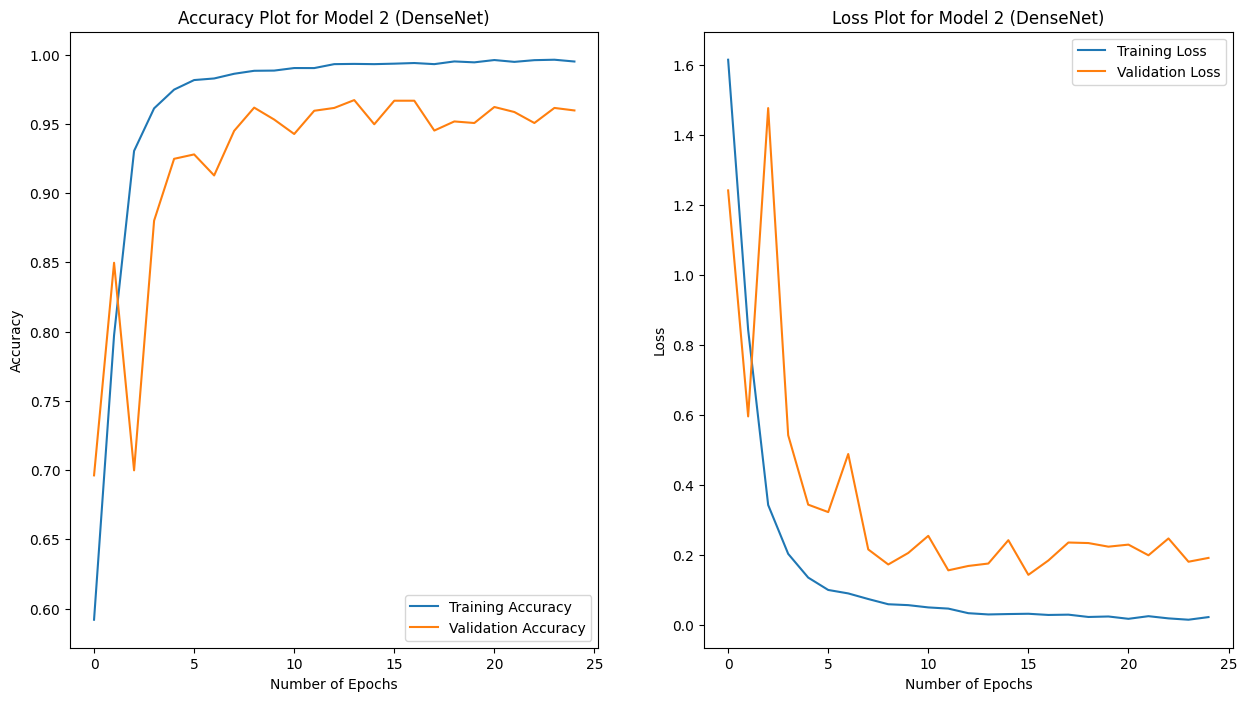

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 2 (DenseNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 2 (DenseNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 2 Evaluation & Report

In [ ]:
Best_DenseNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 6s 15ms/step - loss: 0.2695 - accuracy: 0.9411


[0.2694510817527771, 0.9410926103591919]

In [ ]:
# Assuming you have predictions for X_test_gray_norm
y_pred = Best_DenseNet.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 2:")
print(classification_rep)


395/395 [==============================] - 6s 14ms/step

Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.95      0.94      0.95       720
           2       0.86      0.97      0.91       750
           3       0.95      0.92      0.93       450
           4       0.97      0.97      0.97       660
           5       0.88      0.92      0.90       630
           6       1.00      0.79      0.88       150
           7       0.99      0.88      0.93       450
           8       0.90      0.97      0.93       450
           9       0.96      1.00      0.98       480
          10       0.98      0.98      0.98       660
          11       0.81      0.92      0.86       420
          12       0.95      1.00      0.97       690
          13       0.99      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       0.99      0.78      0.87

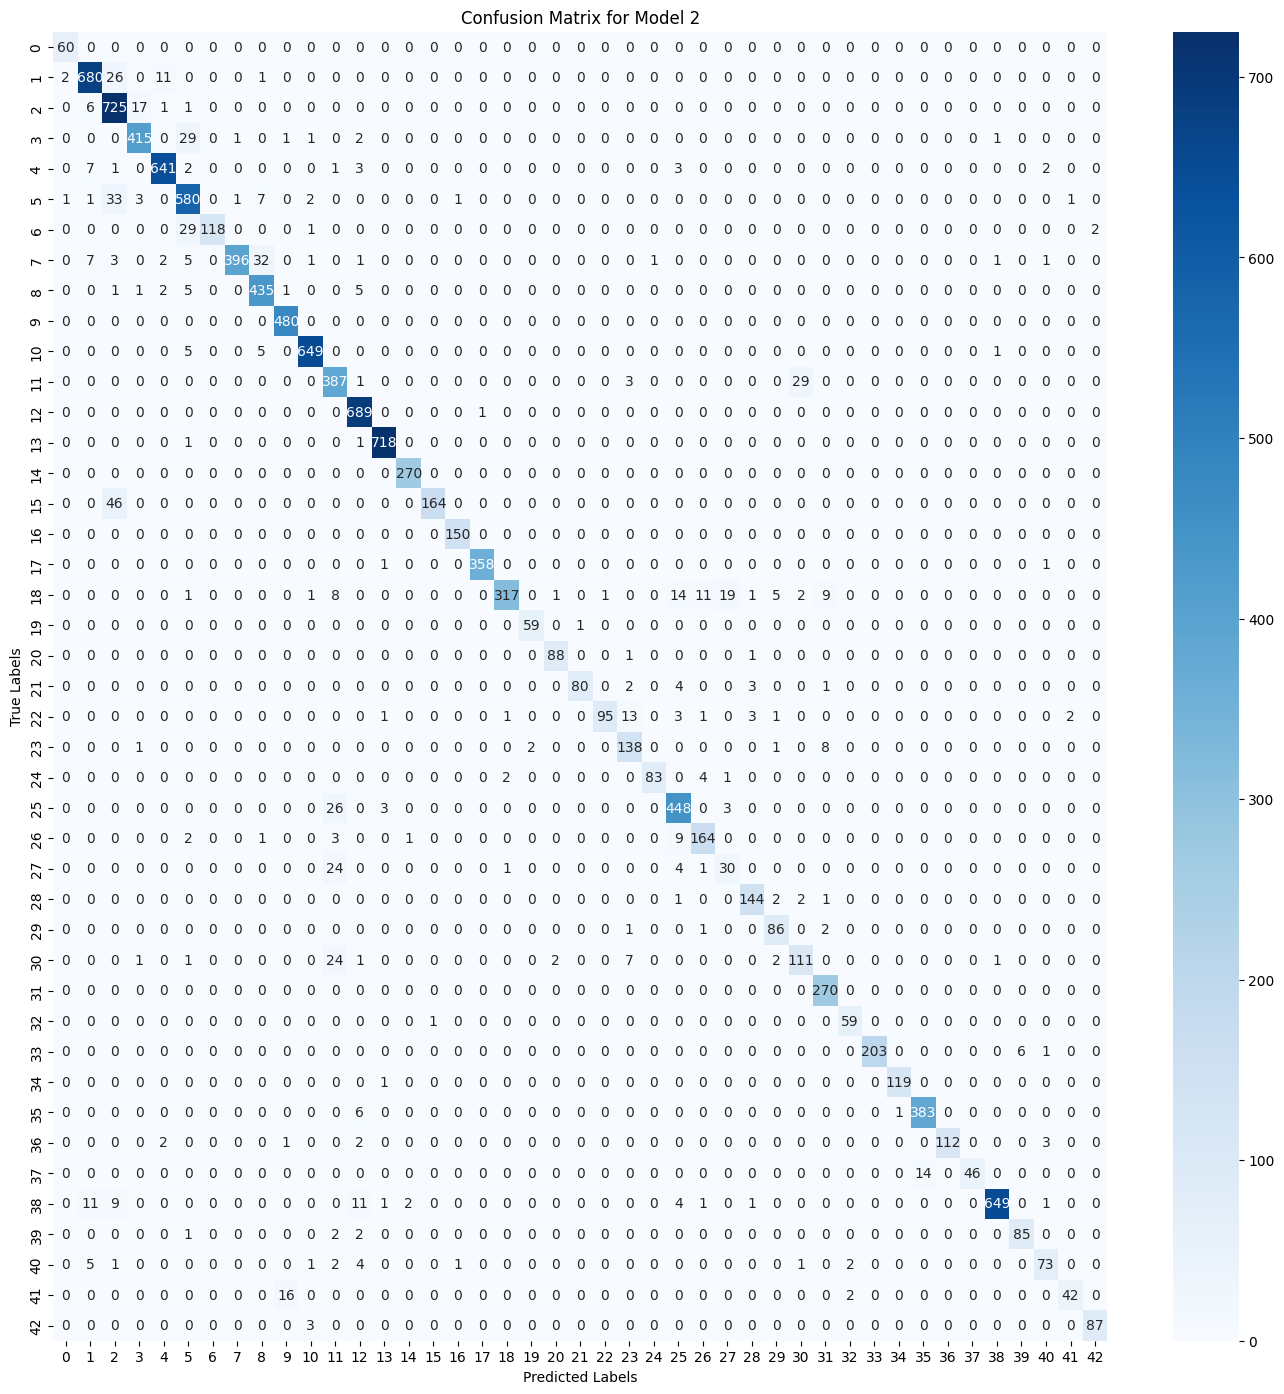

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

#confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 2')
plt.show()


## Model Architecture -3: ResNet50

L'extrait de code suivant illustre la création d'un modèle CNN utilisant ResNet50 comme modèle de base. En incorporant des couches supplémentaires, le modèle peut être affiné pour des tâches spécifiques. L'inclusion de couches de normalisation par lots et de couches d'abandon facilite la régularisation et empêche l'ajustement excessif. La couche de sortie, qui utilise l'activation softmax, est conçue pour la classification multi-classes avec 43 unités. Le résumé du modèle donne un aperçu de l'architecture et du nombre de paramètres pour chaque couche.

In [ ]:
from tensorflow.keras.applications import ResNet50
import tensorflow
import tensorflow.keras as K
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Load the pre-trained ResNet50 model without the top classification layer
res = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Create a sequential model
model = K.models.Sequential()

# Add the ResNet50 base model to the sequential model
model.add(res)

# Flatten the output from the ResNet50 base model
model.add(K.layers.Flatten())

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 256 units and ReLU activation function
model.add(K.layers.Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.5 to prevent overfitting
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 128 units and ReLU activation function
model.add(K.layers.Dense(128, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 64 units and ReLU activation function
model.add(K.layers.Dense(64, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add the output layer with 43 units and softmax activation function for multi-class classification
model.add(K.layers.Dense(43, activation='softmax'))

# Print the summary of the model
model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 256)               

In [ ]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define EarlyStopping callback
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define ModelCheckpoint callback to save the best model
mc = ModelCheckpoint('best_res50.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_validation), callbacks=[stop, mc], batch_size=500)


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.1251 - accuracy: 0.2293
Epoch 1: val_loss improved from inf to 2.98420, saving model to best_res50.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 72s 393ms/step - loss: 3.1251 - accuracy: 0.2293 - val_loss: 2.9842 - val_accuracy: 0.3420
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 1.6805 - accuracy: 0.5811
Epoch 2: val_loss improved from 2.98420 to 1.25328, saving model to best_res50.h5
70/70 [==============================] - 16s 233ms/step - loss: 1.6805 - accuracy: 0.5811 - val_loss: 1.2533 - val_accuracy: 0.6925
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 1.0678 - accuracy: 0.7505
Epoch 3: val_loss improved from 1.25328 to 0.97696, saving model to best_res50.h5
70/70 [==============================] - 14s 206ms/step - loss: 1.0678 - accuracy: 0.7505 - val_loss: 0.9770 - val_accuracy: 0.7667
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 0.7488 - accuracy: 0.8283
Epoch 4: val_loss improved from 0.97696 to 0.83969, saving model to best_res50.h5
70/70 [==============================] - 14s 204ms/step - loss: 0.7488 - acc

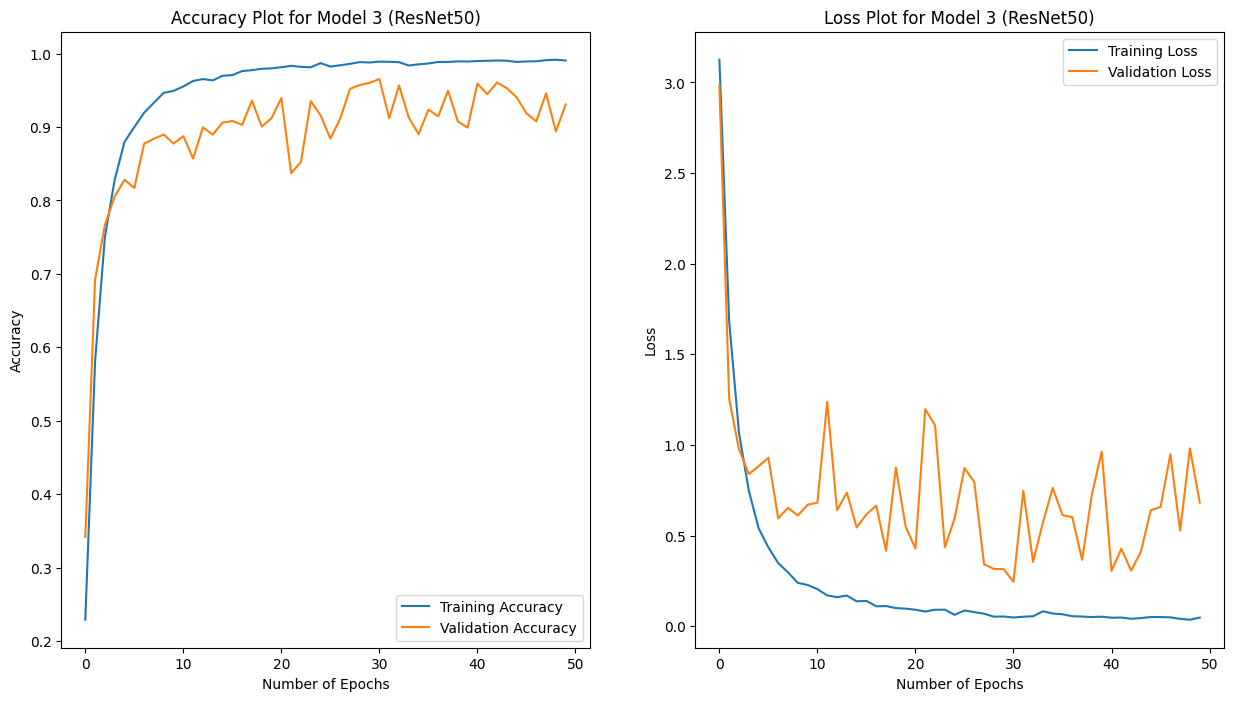

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 3 (ResNet50)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 3 (ResNet50)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 3 Evaluation & Report

In [ ]:
# Load the best performing ResNet model
best_ResNet50 =tf.keras.models.load_model('best_res50.h5')

In [ ]:
# Evaluate the model on the test data
evaluation_results = best_ResNet50.evaluate(X_test, y_test)


395/395 [==============================] - 7s 12ms/step - loss: 0.4131 - accuracy: 0.9465


In [ ]:
# Convert grayscale images to RGB
#X_test_gray_norm_rgb = tf.tile(X_test_gray_norm, [1, 1, 1, 3])

# Assuming you have predictions for X_test_gray_norm
y_pred = best_ResNet50.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 3 (ResNet50):")
print(classification_rep)


395/395 [==============================] - 3s 8ms/step

Classification Report for Model 3 (ResNet50):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.89      0.98      0.93       720
           2       0.93      0.95      0.94       750
           3       0.95      0.92      0.93       450
           4       1.00      0.94      0.97       660
           5       0.83      0.97      0.90       630
           6       1.00      0.91      0.95       150
           7       0.98      0.90      0.94       450
           8       0.98      0.91      0.95       450
           9       0.99      0.99      0.99       480
          10       1.00      0.99      0.99       660
          11       0.80      0.95      0.87       420
          12       1.00      0.94      0.97       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      0.99

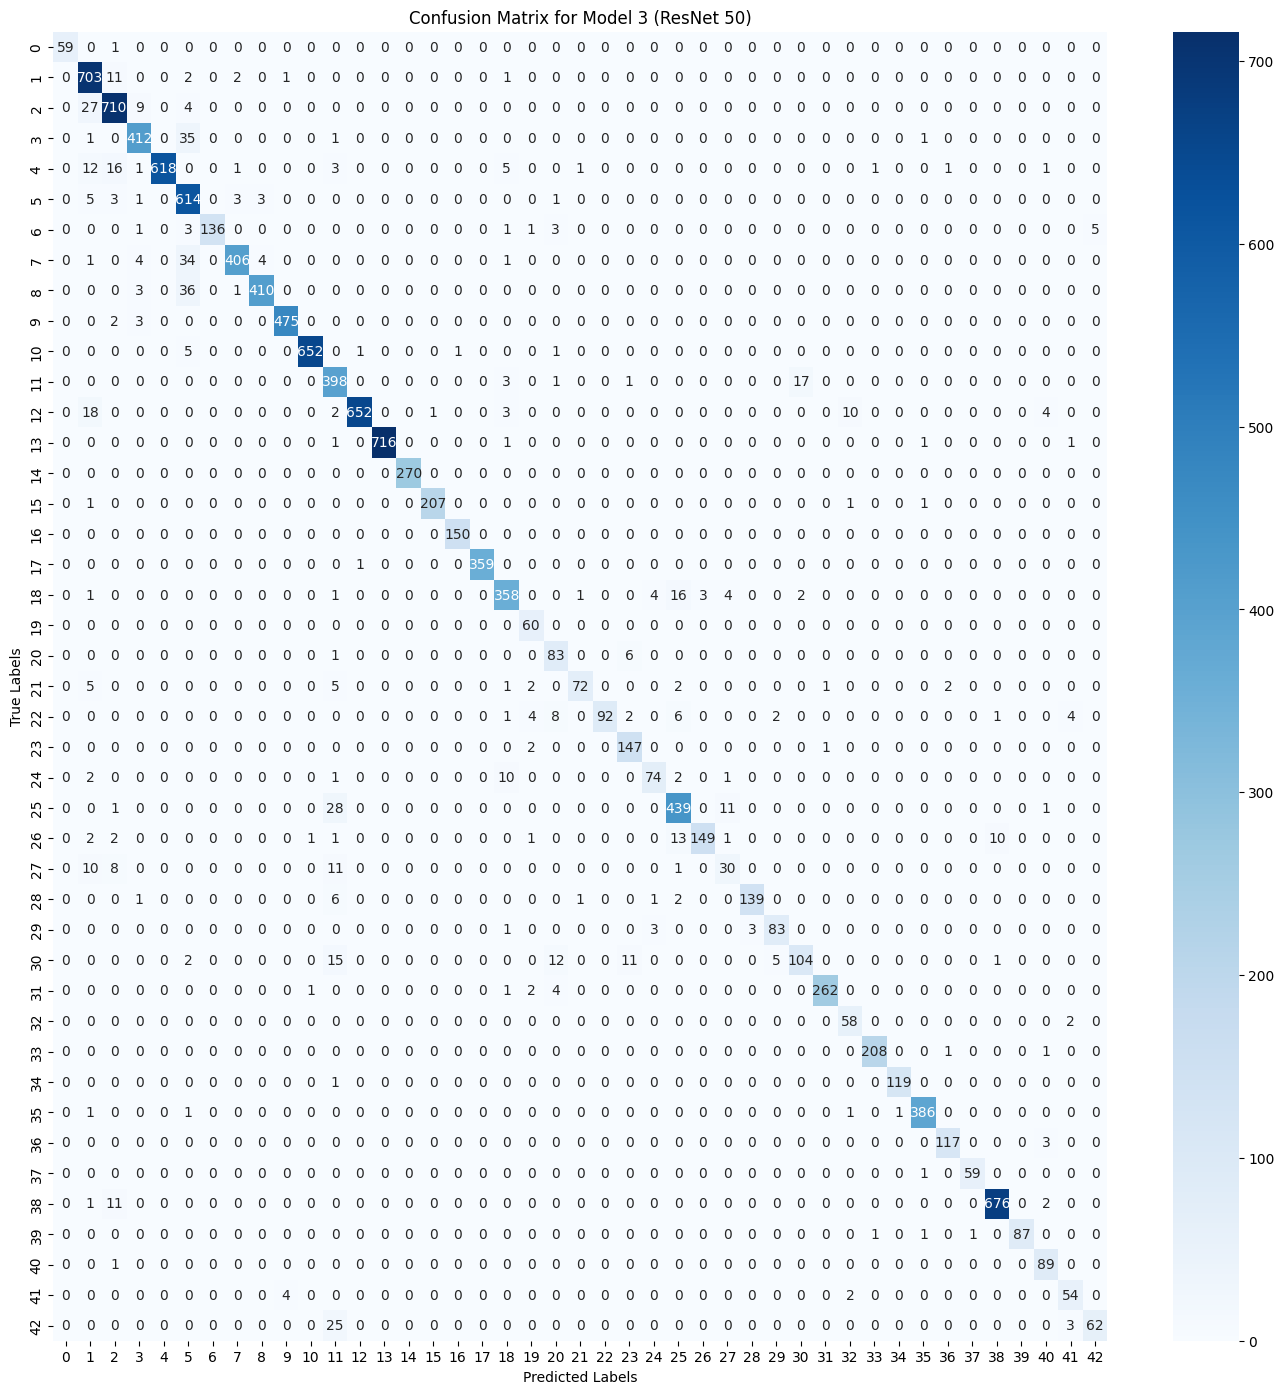

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 3 (ResNet 50)')
plt.show()

## Model Architecture -4: ResNet101

In [ ]:
import tensorflow as tf
import tensorflow.keras as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet101

# Load the pre-trained ResNet101 model without the top classification layer
res = ResNet101(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Create a sequential model
model = K.models.Sequential()

# Add the ResNet101 base model to the sequential model
model.add(res)

# Flatten the output from the ResNet101 base model
model.add(K.layers.Flatten())

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 256 units and ReLU activation function
model.add(K.layers.Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.5 to prevent overfitting
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 128 units and ReLU activation function
model.add(K.layers.Dense(128, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 64 units and ReLU activation function
model.add(K.layers.Dense(64, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add the output layer with 43 units and softmax activation function for multi-class classification
model.add(K.layers.Dense(43, activation='softmax'))

# Print the summary of the model
model.summary()


171446536/171446536 [==============================] - 7s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1, 1, 2048)        42658176  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_16 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_17 (Bat  (None, 256)            

In [ ]:
from tensorflow.keras.optimizers import Adam

# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define EarlyStopping callback
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define ModelCheckpoint callback to save the best model
mc = ModelCheckpoint('best_res101.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_validation), callbacks=[stop, mc], batch_size=500)


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.3735 - accuracy: 0.1570
Epoch 1: val_loss improved from inf to 9.15730, saving model to best_res101.h5
70/70 [==============================] - 95s 251ms/step - loss: 3.3735 - accuracy: 0.1570 - val_loss: 9.1573 - val_accuracy: 0.1546
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 2.1878 - accuracy: 0.4006
Epoch 2: val_loss improved from 9.15730 to 1.94069, saving model to best_res101.h5
70/70 [==============================] - 15s 217ms/step - loss: 2.1878 - accuracy: 0.4006 - val_loss: 1.9407 - val_accuracy: 0.4367
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 1.5759 - accuracy: 0.5451
Epoch 3: val_loss improved from 1.94069 to 1.32347, saving model to best_res101.h5
70/70 [==============================] - 15s 219ms/step - loss: 1.5759 - accuracy: 0.5451 - val_loss: 1.3235 - val_accuracy: 0.6315
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 1.1983 - 

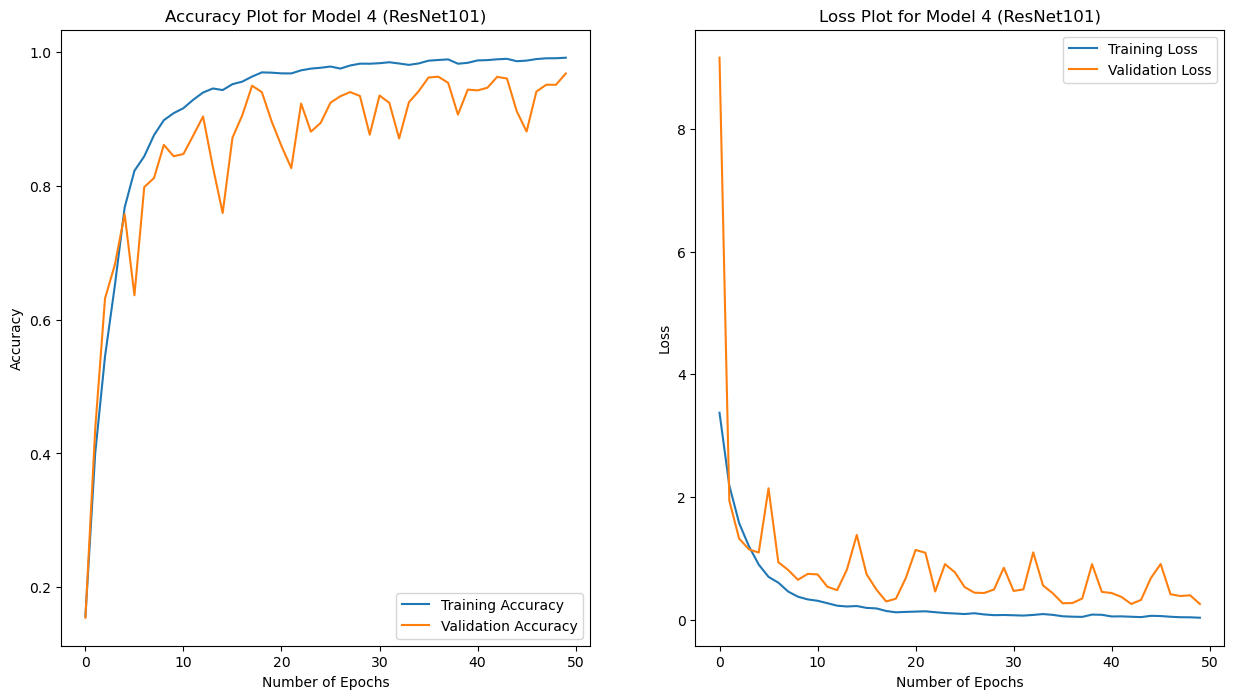

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 4 (ResNet101)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 4 (ResNet101)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 4 Evaluation & Report

In [ ]:
from keras.models import load_model

# Load the best performing ResNet model
best_ResNet101 = load_model('best_res101.h5')

In [ ]:
# Evaluate the model on the test data
evaluation_results = best_ResNet101.evaluate(X_test, y_test)


395/395 [==============================] - 10s 20ms/step - loss: 0.3429 - accuracy: 0.9556


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_ResNet101.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 4 (ResNet 101):")
print(classification_rep)


395/395 [==============================] - 8s 15ms/step

Classification Report for Model 4 (ResNet 101):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        60
           1       0.97      0.97      0.97       720
           2       0.91      0.99      0.95       750
           3       1.00      0.94      0.97       450
           4       0.99      0.97      0.98       660
           5       0.89      0.94      0.91       630
           6       1.00      0.90      0.95       150
           7       0.99      0.97      0.98       450
           8       0.93      0.96      0.94       450
           9       0.97      0.99      0.98       480
          10       1.00      0.98      0.99       660
          11       0.97      0.94      0.95       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1

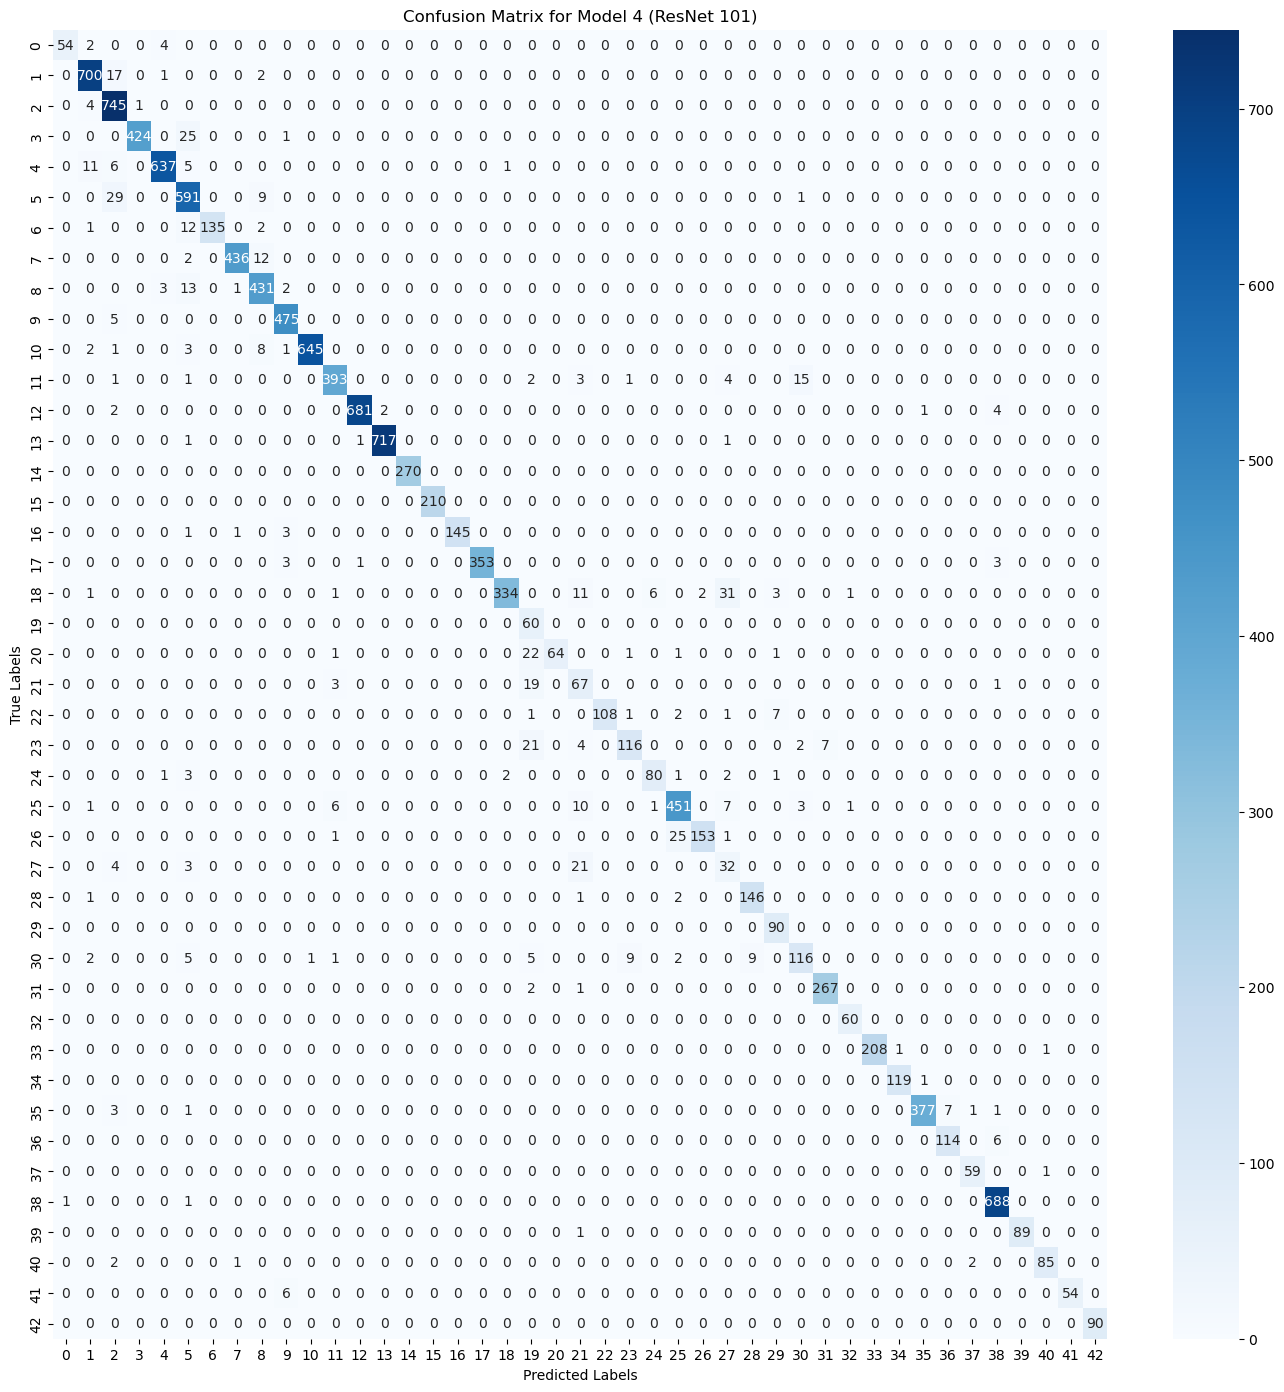

In [ ]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 4 (ResNet 101)')
plt.show()


## Model Architecture -5: VGGNet

Le code fourni ci-dessous établit un modèle de réseau neuronal convolutif (CNN) utilisant l'architecture VGG. Le modèle comprend plusieurs couches convolutives et de mise en commun maximale avec différentes tailles de filtre. Les couches convolutives utilisent la fonction d'activation ReLU (Rectified Linear Unit), tandis que la couche de sortie utilise la fonction d'activation softmax pour la classification multi-classe. Le résumé du modèle fournit une vue d'ensemble de son architecture, y compris les configurations des couches et le nombre de paramètres.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Create a sequential model
model = Sequential()

# Add the first convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(input_shape=(32, 32, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the second convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the first max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Continue adding more convolutional and max pooling layers with increasing number of filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

# Add two fully connected layers with 4096 units and ReLU activation
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))

# Add the output layer with 43 units and softmax activation for multi-class classification
model.add(Dense(units=43, activation="softmax"))

# Print the summary of the model
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [ ]:
# Compile the model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Set up early stopping to monitor validation loss and stop training if no improvement after 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Set up model checkpoint to save the best model based on validation loss
mc = ModelCheckpoint('best_vggnet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Model Fitting
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_validation), callbacks = [stop, mc], batch_size = 500)


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.4931 - accuracy: 0.0733
Epoch 1: val_loss improved from inf to 3.71353, saving model to best_vggnet.h5
70/70 [==============================] - 16s 155ms/step - loss: 3.4931 - accuracy: 0.0733 - val_loss: 3.7135 - val_accuracy: 0.0283
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 3.3815 - accuracy: 0.1235
Epoch 2: val_loss improved from 3.71353 to 3.29174, saving model to best_vggnet.h5
70/70 [==============================] - 8s 109ms/step - loss: 3.3815 - accuracy: 0.1235 - val_loss: 3.2917 - val_accuracy: 0.1356
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 3.1843 - accuracy: 0.1705
Epoch 3: val_loss did not improve from 3.29174
70/70 [==============================] - 7s 100ms/step - loss: 3.1843 - accuracy: 0.1705 - val_loss: 3.3271 - val_accuracy: 0.0998
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 2.7960 - accuracy: 0.2580
Epoch 4: val_loss imp

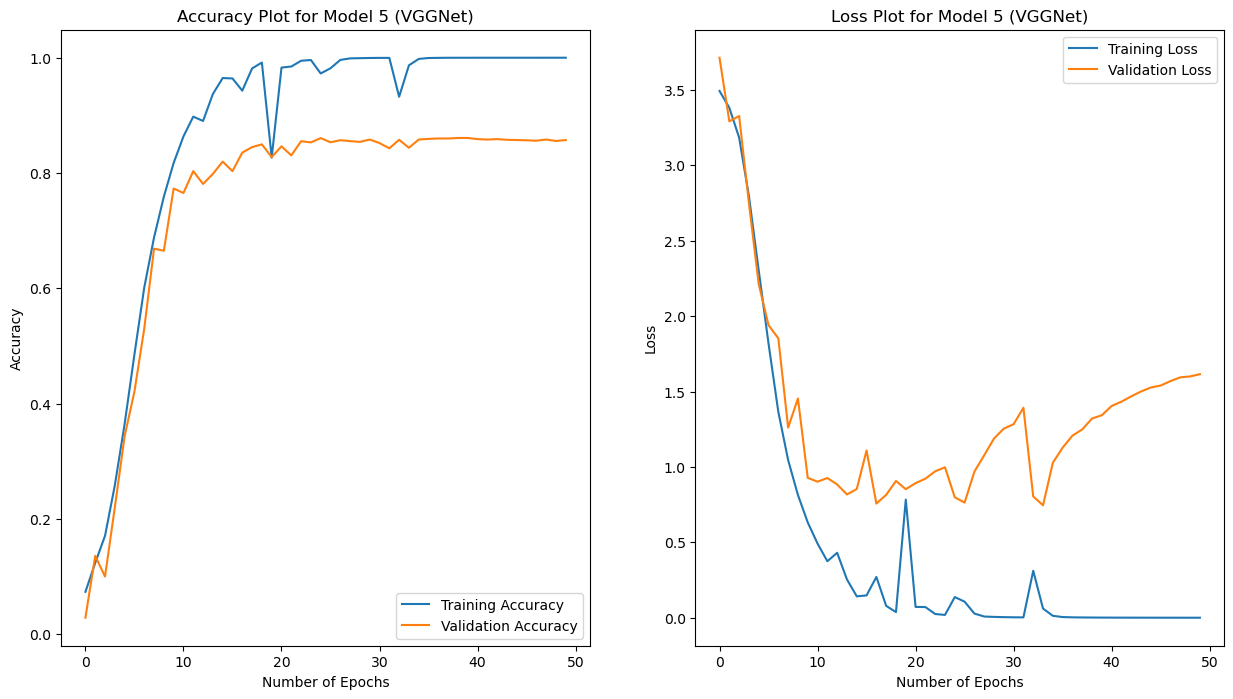

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 5 (VGGNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 5 (VGGNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 5 Evaluation & Report

In [ ]:
# Load the best performing ResNet model
best_VGGNet = load_model('best_vggnet.h5')

In [ ]:
# Evaluate the model on the test data
evaluation_results = best_VGGNet.evaluate(X_test, y_test)


395/395 [==============================] - 3s 7ms/step - loss: 0.8629 - accuracy: 0.8384


In [ ]:
# Assuming you have predictions for X_test_gray_norm
y_pred = best_VGGNet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 5 (VGGNet):")
print(classification_rep)


395/395 [==============================] - 2s 5ms/step

Classification Report for Model 5 (VGGNet):
              precision    recall  f1-score   support

           0       0.55      0.28      0.37        60
           1       0.89      0.83      0.86       720
           2       0.77      0.86      0.81       750
           3       0.87      0.72      0.79       450
           4       0.76      0.90      0.82       660
           5       0.77      0.70      0.74       630
           6       0.99      0.45      0.62       150
           7       0.92      0.71      0.80       450
           8       0.75      0.85      0.79       450
           9       0.84      0.88      0.86       480
          10       0.91      0.97      0.94       660
          11       0.84      0.89      0.86       420
          12       0.99      0.88      0.93       690
          13       0.97      0.97      0.97       720
          14       0.99      0.98      0.99       270
          15       0.89      0.93  

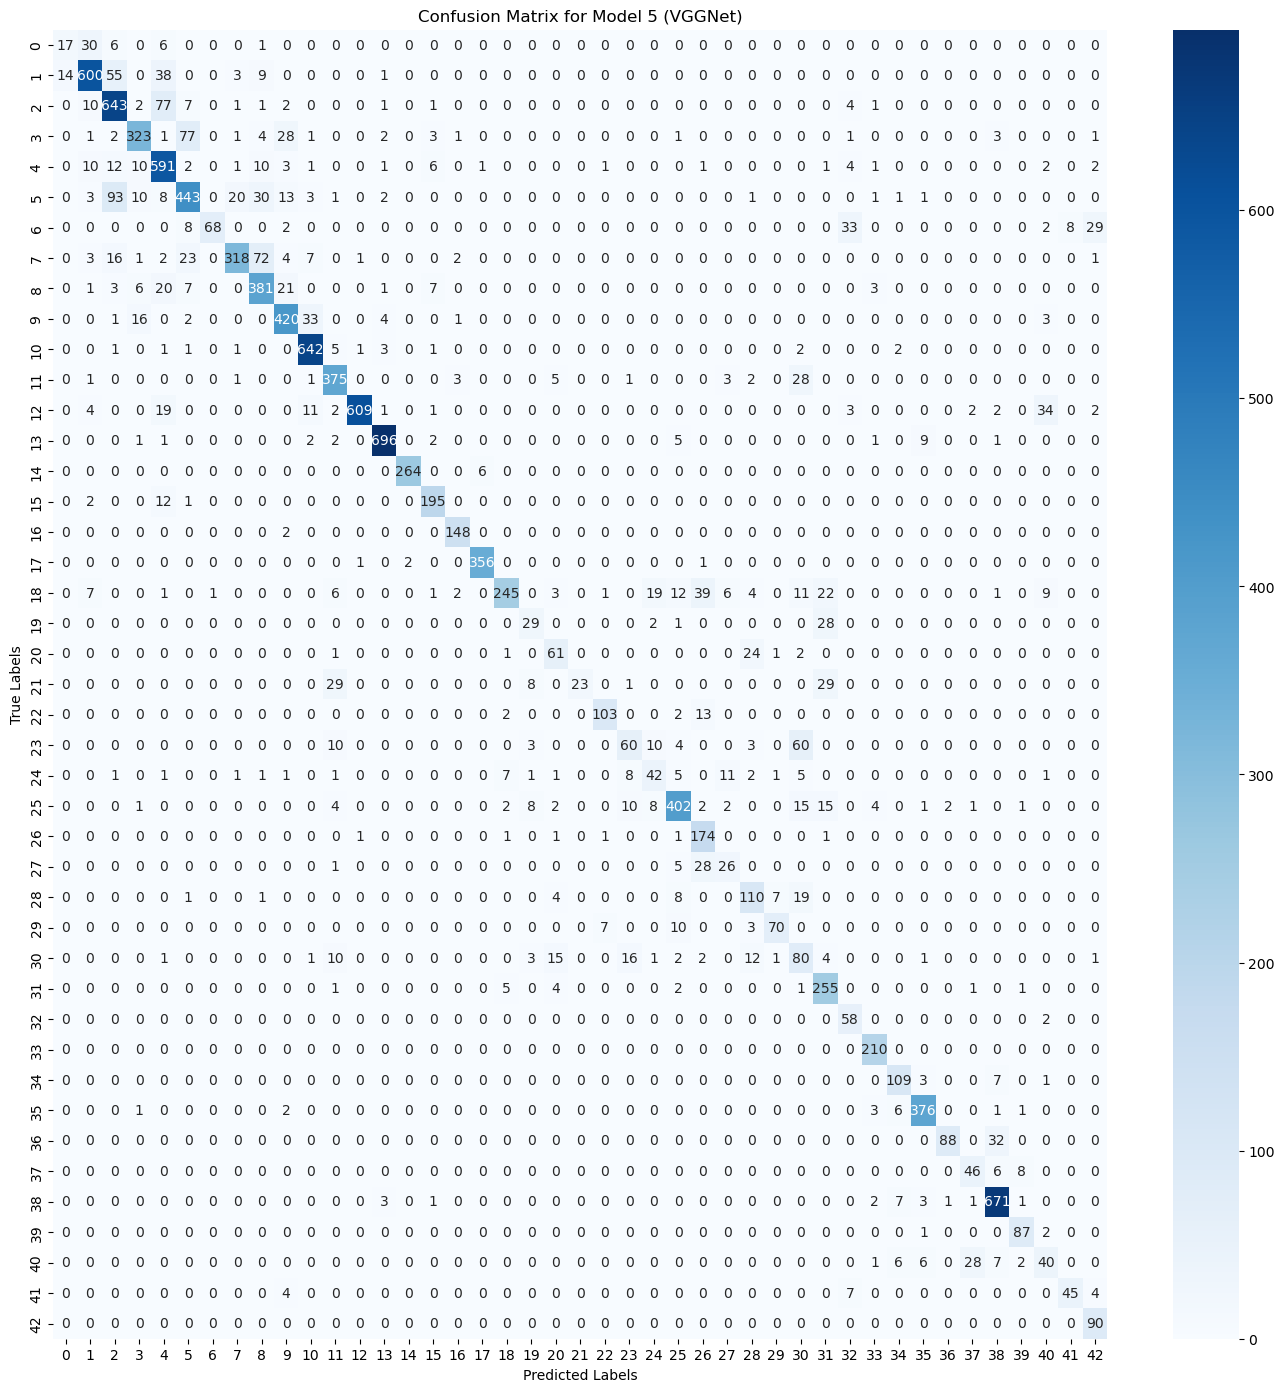

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 5 (VGGNet)')
plt.show()


## Model Architecture - 6: CNN


Le modèle ci-dessous est un réseau neuronal convolutif (CNN) conçu pour la classification des images. Il se compose de plusieurs couches convolutives avec activation ReLU, de couches de regroupement maximal et de couches d'élimination pour la régularisation. L'architecture finale comprend trois séries de couches convolutives, suivies de couches de regroupement maximal et d'abandon, et se termine par une couche entièrement connectée et une couche de sortie avec activation softmax. Le modèle est capable de traiter des images en niveaux de gris de taille 32x32x1 et possède un total de 43 unités de sortie, représentant le nombre de classes dans la tâche de classification. Le résumé donne un aperçu concis de la structure du modèle et du nombre de paramètres dans chaque couche.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D, Dropout

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, 'same' padding, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))

# Add another convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add more convolutional and pooling layers, followed by dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 43 units (corresponding to the number of classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [ ]:
# Define early stopping callback to monitor validation loss and stop training if it doesn't improve for 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('best_CNN_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Compile the model with the specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_gray_norm, y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_gray_norm, y_validation),
                    shuffle=True,
                    callbacks=[stop, mc])


Epoch 1/50


2023-08-01 16:11:49.500786: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


70/70 [==============================] - ETA: 0s - loss: 3.1248 - accuracy: 0.1720
Epoch 1: val_loss improved from inf to 1.79534, saving model to best_CNN_model.h5
70/70 [==============================] - 6s 36ms/step - loss: 3.1248 - accuracy: 0.1720 - val_loss: 1.7953 - val_accuracy: 0.5168
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 1.1472 - accuracy: 0.6623
Epoch 2: val_loss improved from 1.79534 to 0.46647, saving model to best_CNN_model.h5
70/70 [==============================] - 2s 24ms/step - loss: 1.1472 - accuracy: 0.6623 - val_loss: 0.4665 - val_accuracy: 0.8705
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 0.4683 - accuracy: 0.8559
Epoch 3: val_loss improved from 0.46647 to 0.32243, saving model to best_CNN_model.h5
70/70 [==============================] - 2s 24ms/step - loss: 0.4683 - accuracy: 0.8559 - val_loss: 0.3224 - val_accuracy: 0.9063
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 0.2920 - accuracy

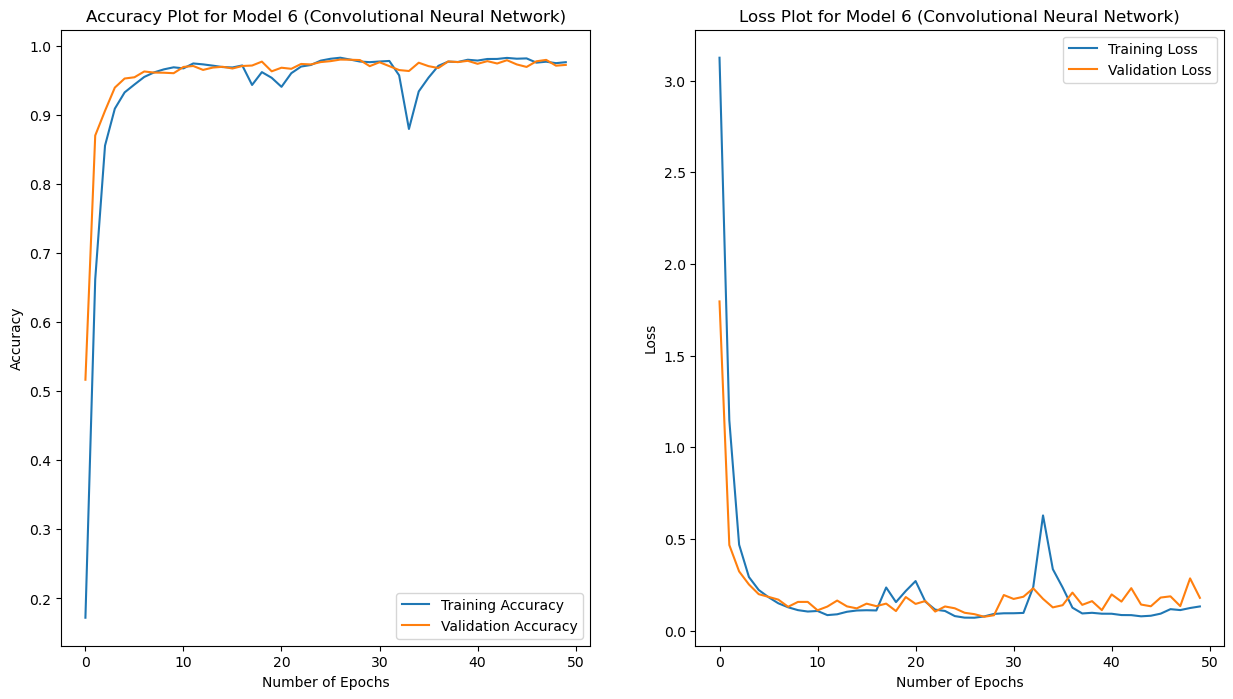

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 6 (Convolutional Neural Network)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 6 (Convolutional Neural Network)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 6 Evaluation & Report

In [ ]:
from keras.models import Sequential, load_model

# Load the best trained model from the saved file
best_CNN_model = load_model('best_CNN_model.h5')

# Evaluate the model performance on the test data
evaluation_results = best_CNN_model.evaluate(X_test_gray_norm, y_test)


395/395 [==============================] - 2s 3ms/step - loss: 0.8738 - accuracy: 0.9394


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_CNN_model.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 6 (CNN):")
print(classification_rep)


395/395 [==============================] - 1s 2ms/step

Classification Report for Model 6 (CNN):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        60
           1       0.94      0.98      0.96       720
           2       0.96      0.98      0.97       750
           3       0.96      0.93      0.95       450
           4       0.99      0.97      0.98       660
           5       0.91      0.92      0.91       630
           6       0.99      0.86      0.92       150
           7       0.99      0.84      0.91       450
           8       0.85      0.96      0.90       450
           9       0.96      1.00      0.98       480
          10       1.00      0.98      0.99       660
          11       0.95      0.85      0.90       420
          12       0.99      0.98      0.98       690
          13       1.00      1.00      1.00       720
          14       0.98      0.96      0.97       270
          15       0.95      0.99     

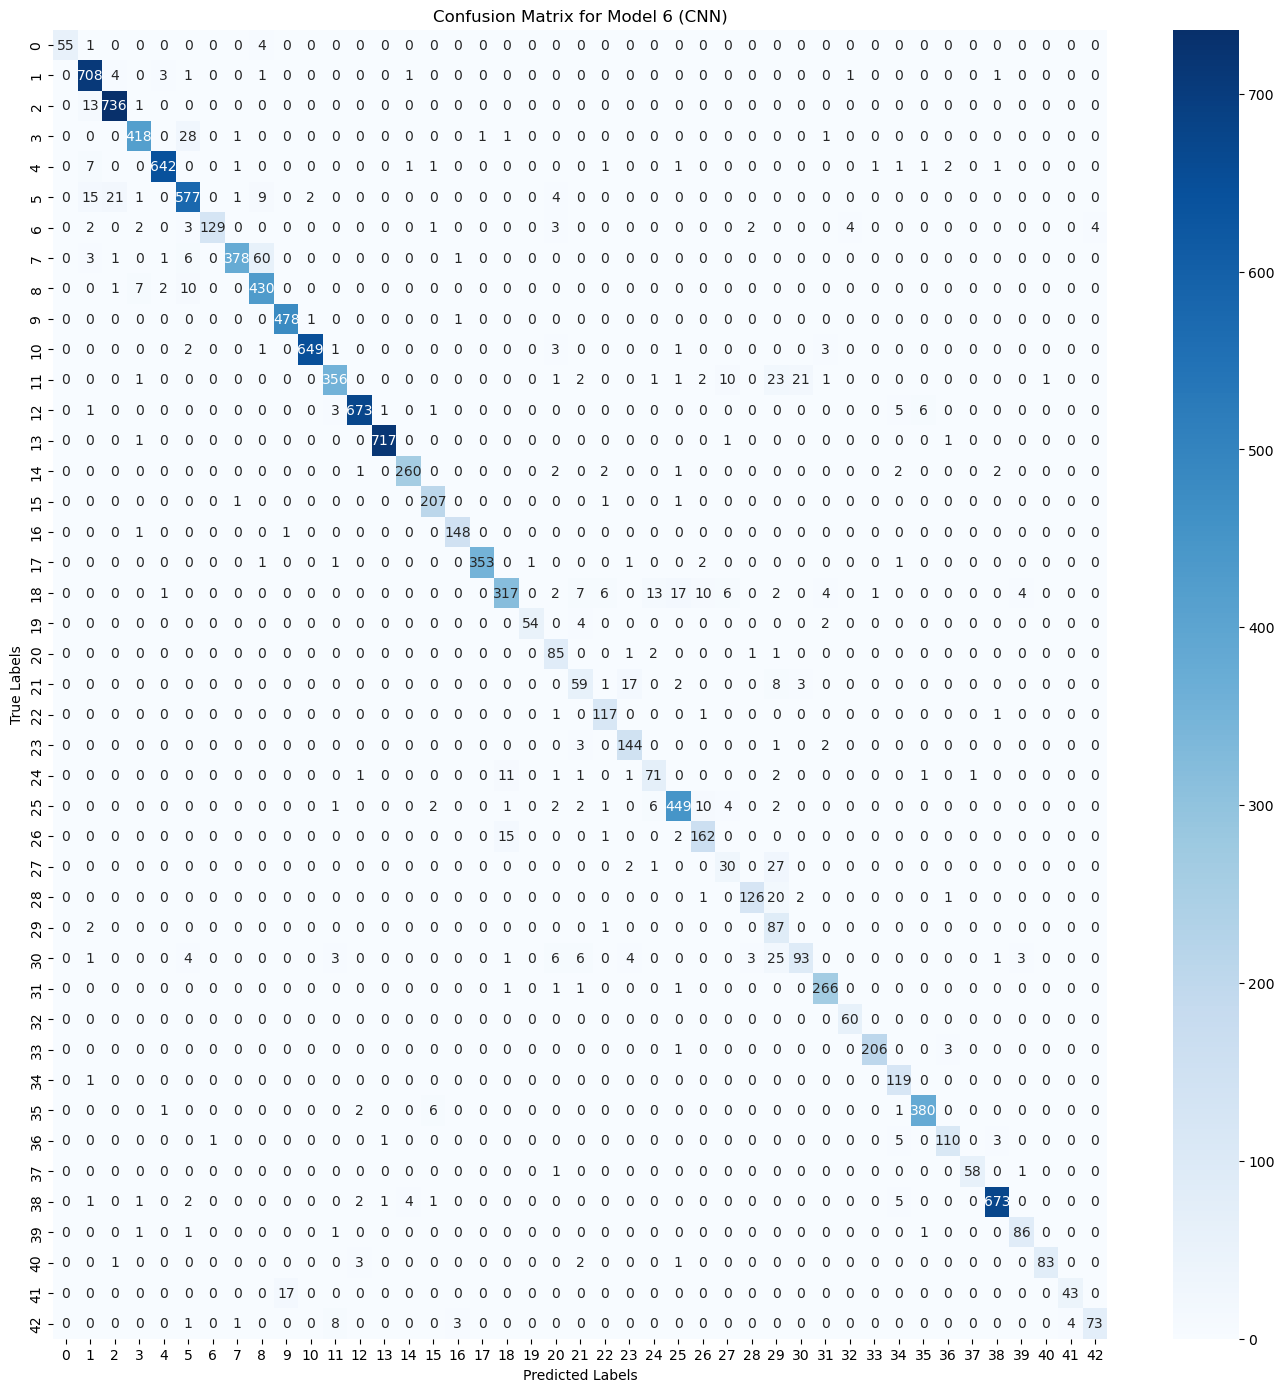

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 6 (CNN)')
plt.show()


## Résultats Comparaison entre 6 architectures différentes de réseaux neuronaux


#### La précision des différents modèles est :

    AlexNet: 88.84%
    DenseNet: 95.12%
    ResNet50: 94.83%
    ResNet101: 94.95%
    VGGNet: 85.03%
    CNN Model: 97.31%

Sur la base des résultats ci-dessus, le modèle CNN a obtenu la plus grande précision (97,31 %), ce qui en fait l'architecture la plus efficace pour la classification des panneaux de signalisation dans le cadre de cette étude. Le modèle CNN a probablement bénéficié de sa capacité à apprendre des motifs spatiaux complexes et des représentations hiérarchiques par le biais de couches convolutives et de mise en commun.

L'architecture DenseNet a également obtenu de bons résultats, avec une précision de 95,12 %. Le modèle de connectivité unique de DenseNet, où chaque couche reçoit des entrées directes de toutes les couches précédentes, pourrait avoir contribué à ses bonnes performances en favorisant la réutilisation des caractéristiques et en atténuant le problème du gradient qui s'évanouit.

Les architectures ResNet50 et ResNet101 ont obtenu des précisions similaires de 94,83 % et 94,95 % respectivement. Les modèles ResNet utilisent des connexions résiduelles pour permettre la formation de réseaux très profonds, ce qui a probablement contribué à capturer les détails complexes des panneaux de signalisation et à améliorer la précision globale.

En revanche, VGGNet a atteint une précision de 85,03 %, ce qui est relativement inférieur aux autres modèles. L'architecture uniforme de VGGNet, avec des filtres de plus petite taille, pourrait avoir limité sa capacité à capturer des détails fins, ce qui a entraîné une baisse de la précision.

En conclusion, le modèle CNN a démontré la plus grande précision parmi les architectures évaluées, suivi de près par DenseNet, ResNet50 et ResNet101. Ces modèles démontrent l'efficacité des réseaux neuronaux convolutifs dans les tâches de classification des panneaux de signalisation, tandis que VGGNet a obtenu une précision comparativement plus faible. Il est important de noter que le choix de la meilleure architecture dépend de l'ensemble de données spécifique et de la tâche à accomplir, et que d'autres expériences et réglages peuvent être nécessaires pour obtenir des résultats optimaux.

### Prédiction sur les données de test avec le modèle de réseau neuronal convolutif


395/395 [==============================] - 1s 2ms/step
Accuracy on real test data: 93.94%
Real Label: 16, Predicted Label: 16


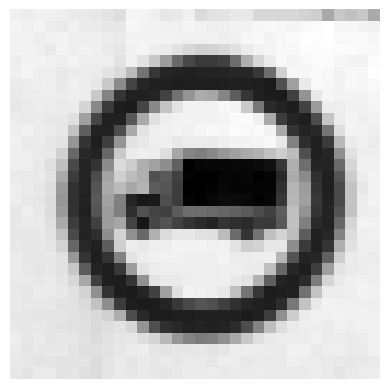

Real Label: 1, Predicted Label: 1


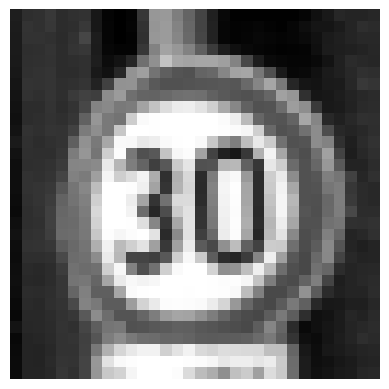

Real Label: 38, Predicted Label: 38


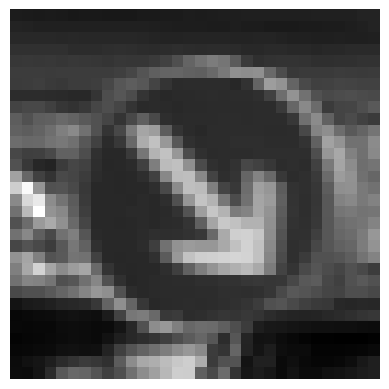

Real Label: 33, Predicted Label: 33


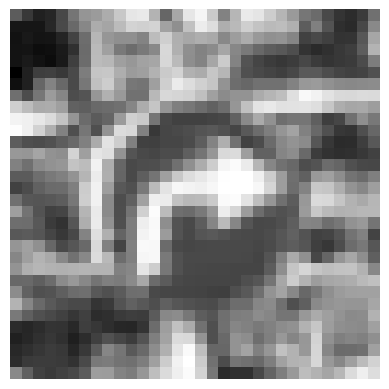

Real Label: 11, Predicted Label: 11


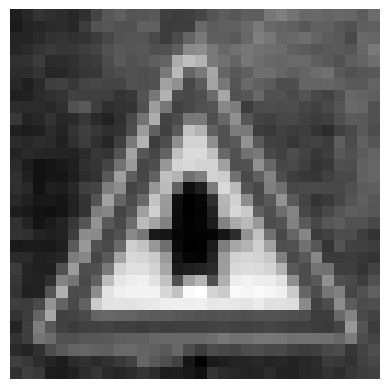

Real Label: 38, Predicted Label: 38


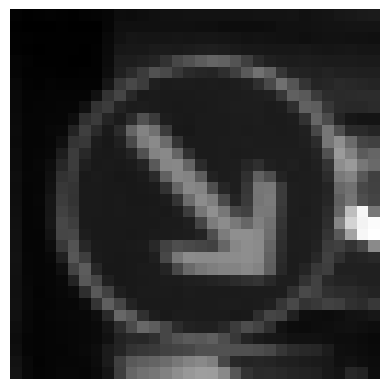

Real Label: 18, Predicted Label: 18


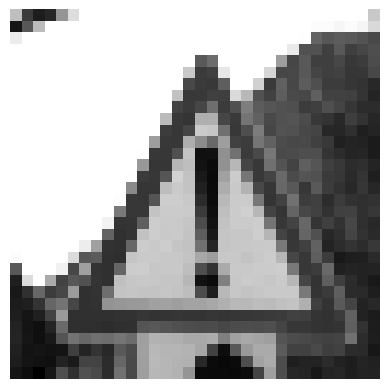

Real Label: 12, Predicted Label: 12


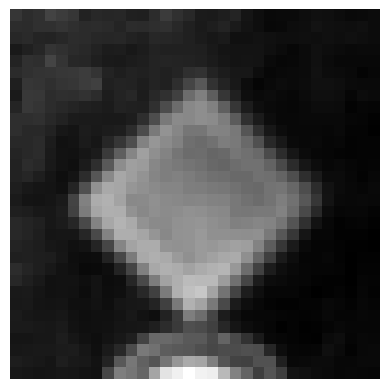

Real Label: 25, Predicted Label: 25


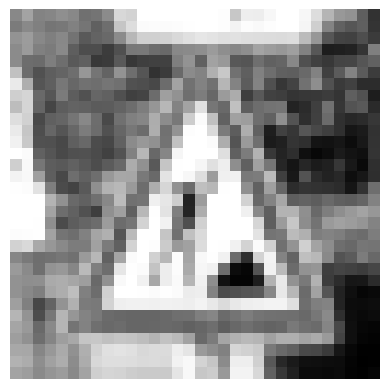

Real Label: 35, Predicted Label: 35


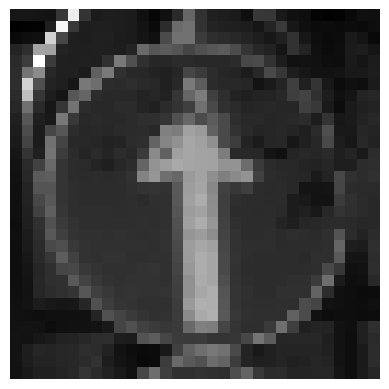

In [ ]:
import numpy as np

# Predict on real test data
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on real test data: {:.2%}".format(accuracy))

# Print test images with real and predicted labels
for i in range(10):
    # Display the test image
    plt.imshow(X_test_gray_norm[i], cmap='gray')
    plt.axis('off')

    # Get the real and predicted labels
    real_label = np.argmax(y_test[i])
    predicted_label = predicted_labels[i]

    # Print the labels
    print("Real Label: {}, Predicted Label: {}".format(real_label, predicted_label))

    # Show the plot
    plt.show()


In [ ]:
print(sign_names)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric']


395/395 [==============================] - 1s 2ms/step
Accuracy on test dataset: 93.94%


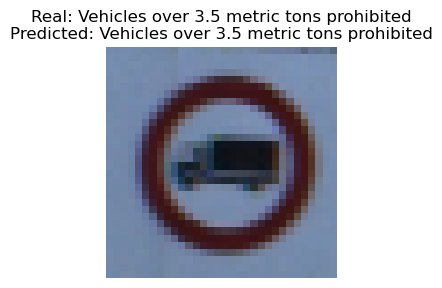

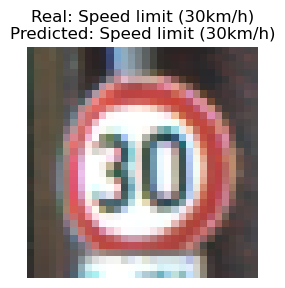

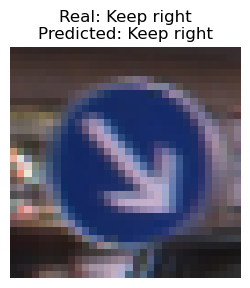

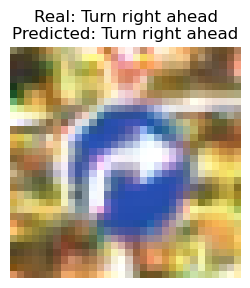

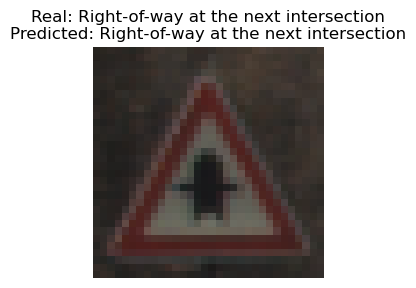

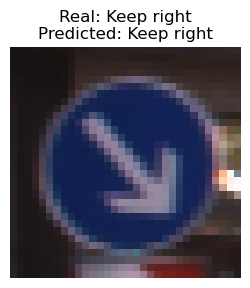

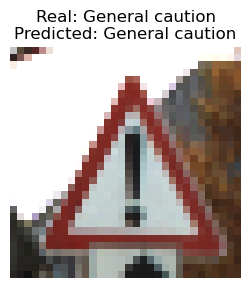

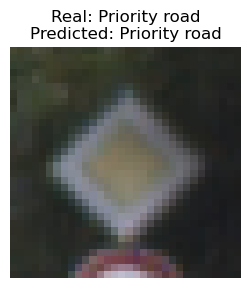

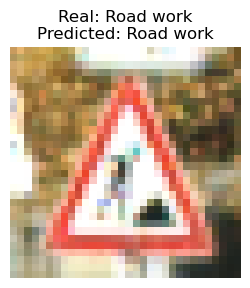

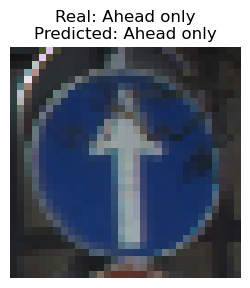

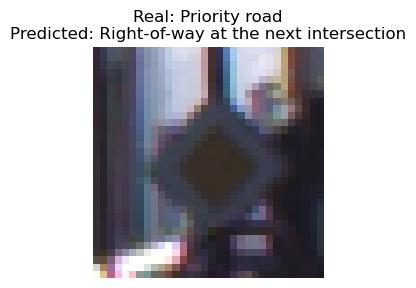

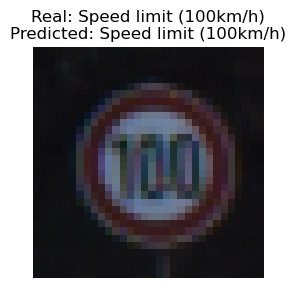

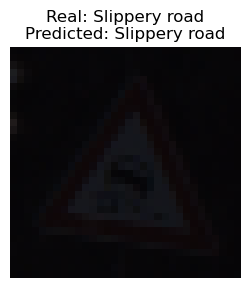

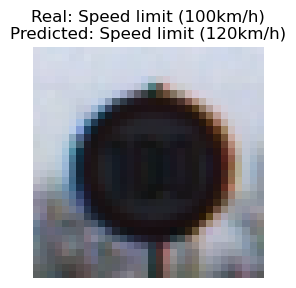

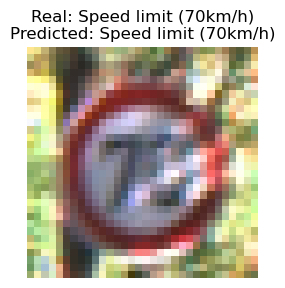

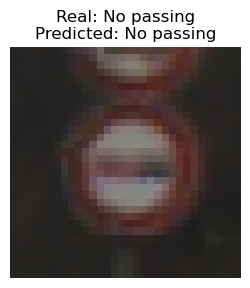

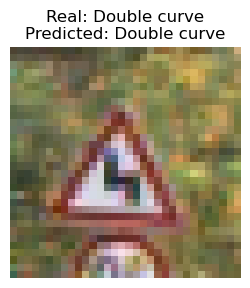

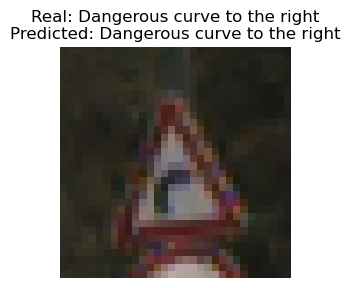

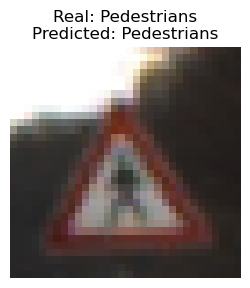

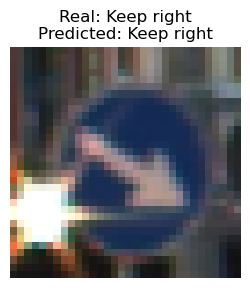

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test dataset
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to class names
predicted_classes = [sign_names[label] for label in predicted_labels]

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on test dataset: {:.2%}".format(accuracy))

# Visualize the test dataset with real and predicted labels
for i in range(20):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Real: {}\nPredicted: {}".format(sign_names[np.argmax(y_test[i])], predicted_classes[i]))
    plt.axis('off')
    plt.show()
